<table>
    <tr>
        <td>
            <img src="https://arm.gov/uploads/TRACER_skyline.jpg" style="height: 200px;" alt="TRACER Campaign"></img>
        </td>
        <td>
            <h1>Atmospheric Radiation Measurement user facility (ARM)</h1>
            <h1>TRacking Aerosol Convection interations ExpeRiment (TRACER)</h1>
            Notebook for learning the basics of ACT with TRACER data </br>
            Corresponding Author: Adam Theisen (atheisen@anl.gov)
        </td>
    </tr>
</table>

## Overview
The ARM TRACER campaign collected a lot of very interesting data in Houston, TX from October 1, 2021 to September 30, 2022.  One event that stands out is a dust event that occurred from July 16 to July 19, 2022.  This notebook will give an introduction to basic features in ACT, using one of the datastreams from this event

1. Intro to ACT
1. Instrument Overview
1. Downloading and Reading in PSAP Data
1. Quality Controlling Data
1. Visualizing Data
1. Questions for the User to Explore

## Prerequisites
This notebook will rely heavily on Python and the [Atmospheric data Community Toolkit (ACT)](https://github.com/ARM-DOE/ACT).  Don't worry if you don't have experience with either, this notebook will walk you though what you need to know.

You will also need an account and token to download data using the ARM Live webservice.  Navigate to the [webservice information page](https://adc.arm.gov/armlive/) and log in to get your token.  Your account username will be your ARM username.

| Concepts | Importance | Notes |
| --- | --- | --- |
| [ACT](https://github.com/ARM-DOE/ACT) | Helpful | |

- **Time to learn**: 60 Minutes
- **System requirements**:
    - Python 3.11 or latest
    - ACT v2.0.0 or latest
    - numpy
    - xarray
    - matplotlib

---

## Intro to ACT
           
The [Atmospheric data Community Toolkit (ACT)](https://github.com/ARM-DOE/ACT) is an open-source Python toolkit for exploring and analyzing atmospheric time-series datasets.  Examples can be found in the [ACT Example Gallery](https://arm-doe.github.io/ACT/source/auto_examples/index.html).  The toolkit has modules for many different parts of the scientific process, including:

<table>
    <tr>
        <td>
            
#### Data Discovery (act.discovery)
The [discovery](https://arm-doe.github.io/ACT/API/generated/act.discovery.html) module houses functions to download or access data from different groups.  Currently it includes function to get data for ARM, NOAA, EPA, NEON, and more!

#### Input/Output (act.io)
[io](https://arm-doe.github.io/ACT/API/generated/act.io.html) contains functions for reading and writing data from various sources and formats.

#### Visualization (act.plotting)
[plotting](https://arm-doe.github.io/ACT/API/generated/act.plotting.html) contains various routines, built on matplotlib, to help visualize and explore data.  These include 
1. Time-series plots
1. Distribution plots like histograms and heatmaps
1. Geographic plots for moving systems like radiosondes or aircraft
1. Skew-T plots for radiosonde data, built off MetPy
1. Wind rose plots for wind and data roses
1. Cross-section plots for working with 3-dimensional data

#### Corrections (act.corrections)
[corrections](https://arm-doe.github.io/ACT/API/generated/act.corrections.html) apply different corrections to data based on need.  A majority of the existing corrections are for lidar data.

#### Quality Control (act.qc)
The [qc](https://arm-doe.github.io/ACT/API/generated/act.qc.html) module has a lot of functions for working with quality control information, apply new tests, or filtering data based on existing tests.  We will explore some of that functionality in this notebook.

#### Retrievals (act.retrievals)
There are many cases in which some additional calculations are necessary to get more value from the instrument data.  The [retrievals](https://arm-doe.github.io/ACT/API/generated/act.retrievals.html) module houses some functions for performing these advanced calculations.  

#### Utilities (act.utils)
The [utils](https://arm-doe.github.io/ACT/API/generated/act.utils.html) module has a lot of general utilities to help with the data.  Some of these include adding in a solar variable to indicate day/night (useful in filtering data), unit conversions, decoding WMO weather codes, performing weighted averaging, etc...
        </td>
        <td>
            <center>
            <img src="https://arm-doe.github.io/ACT/_images/sphx_glr_plot_neon_001.png" alt="NEON-ARM"></img>
            <figcaption>ARM and NEON data from Utquivaik, AK</figcaption>
            <img src="https://arm-doe.github.io/ACT/_images/sphx_glr_plot_enhanced_skewt_001.png" alt="SONDE"></img>
            <figcaption>Enhanced Skew-T plot from ARM's Southern Great Plains Site (SGP)</figcaption>
            </center>
        </td>
    </tr>
</table>

---

## Instrument Overview
<table>
    <tr>
        <td>
            
### Particle Soot Absorption Photometer (PSAP)
The particle soot absorption photometer collects aerosol particles on a substrate (filter) and measurements the change in light transmission relative to a reference filter.  Bulk particle absorption is derived after correcting for scattering effects.  [Lean more](https://arm.gov/capabilities/instruments/psap)

### Single Particle Soot Photometer (SP2)
The single-particle soot photometer (SP2) measures the soot (black carbon) mass of individual aerosol particles by laser-induced incandescence down to concentrations as low as ng/m^3. [Learn more](https://arm.gov/capabilities/instruments/sp2)

### Aerodynamic Particle Sizer (APS)
The aerodynamic particle sizer (APS) is a particle size spectrometer that measures both the particle aerodynamic diameter based on particle time of flight and optical diameter based on scattered light intensity. The APS provides the number size distribution for particles with aerodynamic diameters from 0.5 to 20 micrometers and with optical diameters from 0.3 to 20 micrometers. [Learn more](https://arm.gov/capabilities/instruments/aps)

### Doppler Lidar (DL)
The Doppler lidar (DL) is an active remote-sensing instrument that provides range- and time-resolved measurements of the line-of-sight component of air velocity (i.e., radial velocity) and attenuated aerosol backscatter. The DL operates in the near-infrared and is sensitive to backscatter from atmospheric aerosol, which are assumed to be ideal tracers of atmospheric wind fields. [Learn more](https://arm.gov/capabilities/instruments/dl)

### Aerosol Chemical Speciation Monitor (ACSM)
The aerosol chemical speciation monitor is a thermal vaporization, electron impact, ionization mass spectrometer that measures bulk chemical composition of the rapidly evaporating component of sub-micron aerosol particles in real time. Standard measurements include mass concentrations of organics, sulfate, nitrate, ammonium, and chloride. [Learn more](https://arm.gov/capabilities/instruments/acsm)

### Scanning mobility particle sizer (SMPS)
The scanning mobility particle sizer (SMPS) is a particle size spectrometer that measures the aerosol number size distribution by sizing particles based on their electrical mobility diameter using a differential mobility analyzer (DMA) and by counting particles using a condensation particle counter (CPC). It measures aerosol concentration and aerosol particle size distribution. [Learn more](https://arm.gov/capabilities/instruments/smps)

### Surface Meteorological Instrumentation (MET)
The ARM Surface Meteorology Systems (MET) use mainly conventional in situ sensors to obtain 1-minute statistics of surface wind speed, wind direction, air temperature, relative humidity, barometric pressure, and rain-rate. [Learn more](https://arm.gov/capabilities/instruments/met)

### Micropulse Lidar (MPL)
The micropulse lidar (MPL) is a ground-based, optical, remote-sensing system designed primarily to determine the altitude of clouds; however, it is also used for detection of atmospheric aerosols. [Learn more](https://arm.gov/capabilities/instruments/mpl)
        </td>
        <td>
            <center>
            <img src="https://encrypted-tbn1.gstatic.com/images?q=tbn:ANd9GcSg1h63flPTG_EkHS5IUvjncBkqSoC1WYA1O6jJxZyJB_ffmY7b" alt="PSAP"></img>
            <figcaption>Particle Soot Absorption Photometer</figcaption>
            <img src="https://encrypted-tbn1.gstatic.com/images?q=tbn:ANd9GcTteorWfZBD2B9M0Ityhf_uCsbfBXrK9Dp_z7KW9GhTFaTaZAoE" alt="SP2"></img>
            <figcaption>Single Particle Soot Photometer</figcaption>
            <img src="https://live.staticflickr.com/5478/12486199374_23c941c2b7_c.jpg" alt="MPL" style="height: 200px;"></img>
            <figcaption>Micropulse Lidar</figcaption>
            </center>
        </td>
    </tr>
</table>

---

## Imports
Let's get started with some data!  But first, we need to import some libraries.

In [92]:
import act
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('ticks')
%config InlineBackend.figure_format='retina'

## Downloading and Reading ARM's NetCDF Data
ARM's standard file format is NetCDF (network Common Data Form) which makes it very easy to work with in Python!  ARM data are available through a data portal called [Data Discovery](https://adc.arm.gov/discovery/#/) or through a webservice.  If you didn't get your username and token earlier, please go back and see the Prerequisites!

Let's download some of the PSAP data first but let's just start with one day.

In [117]:
# Set your username and token here!
username = 'jyyoon'
token = '34cb1c19d27236d3'

# Set the datastream and start/enddates
datastream = 'houaospsap3w1mM1.b1'
startdate = '2022-07-16'
enddate = '2022-07-16'

# Use ACT to easily download the data.  Watch for the data citation!  Show some support
# for ARM's instrument experts and cite their data if you use it in a publication
result = act.discovery.download_arm_data(username, token, datastream, startdate, enddate)

[DOWNLOADING] houaospsap3w1mM1.b1.20220716.000030.nc

If you use these data to prepare a publication, please cite:

Ermold, B., Flynn, C., Trojanowski, R., Andrews, E., Hayes, C., Salwen, C., &
Flynn, C. Particle Soot Absorption Photometer (AOSPSAP3W1M). Atmospheric
Radiation Measurement (ARM) User Facility. https://doi.org/10.5439/1225037



In [118]:
# Let's read in the data using ACT and check out the data
ds = act.io.read_arm_netcdf(result)
ds

<xarray.Dataset> Size: 184kB
Dimensions:                 (time: 1440, bound: 2)
Coordinates:
  * time                    (time) datetime64[ns] 12kB 2022-07-16T00:00:30 .....
Dimensions without coordinates: bound
Data variables: (12/30)
    base_time               datetime64[ns] 8B 2022-07-16
    time_offset             (time) datetime64[ns] 12kB 2022-07-16T00:00:30 .....
    time_bounds             (time, bound) object 23kB dask.array<chunksize=(1440, 2), meta=np.ndarray>
    sample_volume           (time) float32 6kB dask.array<chunksize=(1440,), meta=np.ndarray>
    qc_sample_volume        (time) int32 6kB dask.array<chunksize=(1440,), meta=np.ndarray>
    transmittance_blue      (time) float32 6kB dask.array<chunksize=(1440,), meta=np.ndarray>
    ...                      ...
    qc_sample_flow_rate     (time) int32 6kB dask.array<chunksize=(1440,), meta=np.ndarray>
    spot_size_area          float32 4B ...
    impactor_state          (time) float64 12kB dask.array<chunksize=(1440,), meta=np.ndarray>
    lat                     float32 4B ...
    lon                     float32 4B ...
    alt                     float32 4B ...
Attributes: (12/23)
    command_line:             aospsap3w1m -s hou -f M1
    Conventions:              ARM-1.2
    process_version:          ingest-aospsap3w1m-1.2-0.el7
    dod_version:              aospsap3w1m-b1-1.1
    site_id:                  hou
    platform_id:              aospsap3w1m
    ...                       ...
    doi:                      10.5439/1225037
    history:                  created by user dsmgr on machine flint at 2022-...
    _file_dates:              ['20220716']
    _file_times:              ['000030']
    _datastream:              houaospsap3w1mM1.b1
    _arm_standards_flag:      1

In [119]:
# We're going to be focusing on the following variable, so let's get some more information about it
# We can do this by looking at it's attributes
variable = 'Ba_B_Weiss'
ds[variable].attrs

{'long_name': 'Aerosol light absorption coefficient, blue channel at dry or reference RH',
 'units': '1/Mm',
 'valid_min': -1.0,
 'cell_methods': 'time: mean',
 'measured_wavelength': '464 nm',
 'corrections_applied': 'mass_flow_calibration dilution_correction filter_loading_correction',
 'mass_flow_calibration_comment': 'PSAP mass flow meter calibrated against Gilibrator corrected to reference conditions',
 'dilution_correction_comment': 'aerosol sample flow rate reduced by dilution correction factor',
 'filter_loading_correction_comment': 'Absorption coefficients adjusted for filter loading by multiplying by Weiss transfer function f_w = 1/1.22 * ((0.97*0.873)/(1.0796 Tr + 0.71)) = 1 / (1.5557Tr + 1.0227) where Tr is the transmittance for a given wavelength.  This form modifies the original PSAP transfer function with results of Bond 1999, Sheridan 2005, and Ogren 2010 as summarized in Virkkula 2010.',
 'ancillary_variables': 'qc_Ba_B_Weiss'}

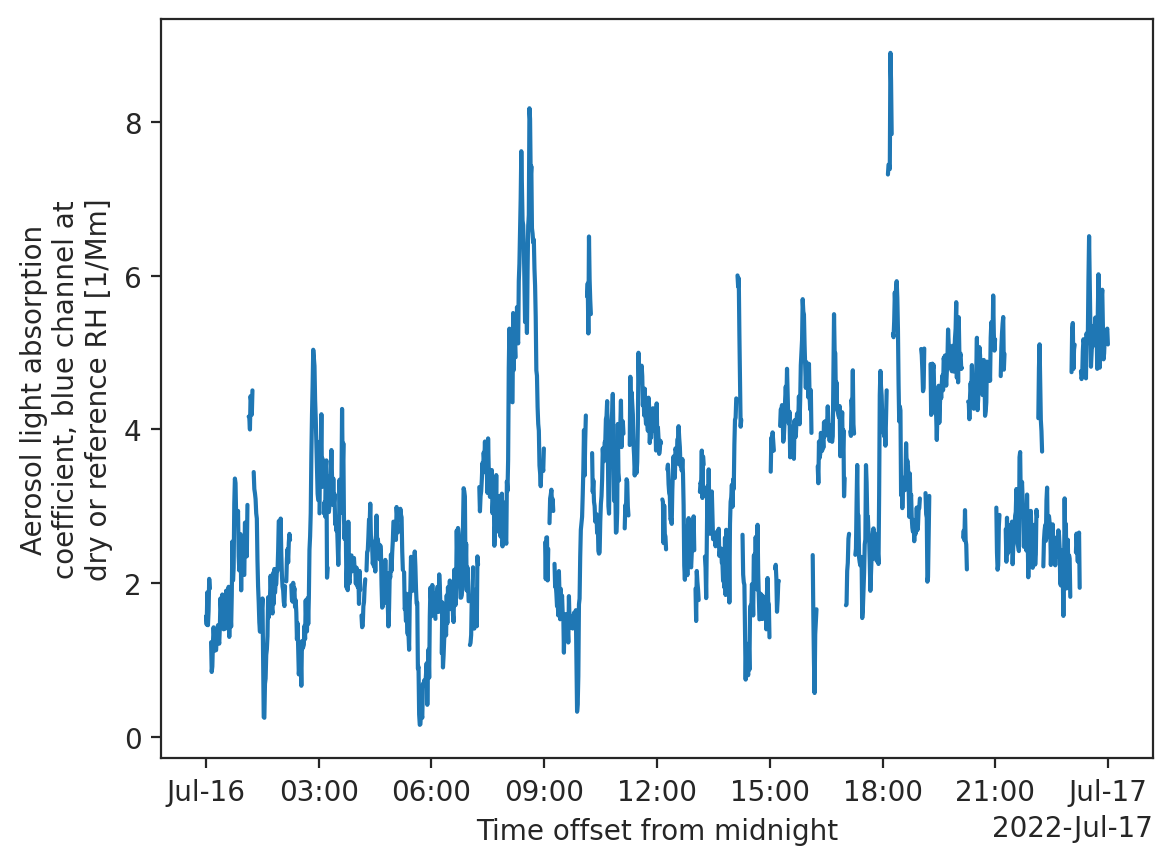

In [120]:
# There's a lot of great functionality in ACT, but there's also a lot in the base xarray Dataset!
ds[variable].plot()

## Quality Controlling Data

ARM has multiple methods that it uses to communicate data quality information out to the users.  One of these methods is through "embedded QC" variables.  These are variables within the file that have information on automated tests that have been applied.  Many times, they include Min, Max, and Delta tests but as is the case with the AOS instruments, there can be more complicated tests that are applied.

The results from all these different tests are stored in a single variable using bit-packed QC.  We won't get into the full details here, but it's a way to communicate the results of multiple tests in a single integer value by utilizing binary and bits!  You can learn more about bit-packed QC [here](https://code.arm.gov/docs/QC-flag-examples/-/wikis/home) but ACT also has many of the tools for working with ARM QC.

#### Other Sources of Quality Control
ARM also communicates problems with the data quality through Data Quality Reports (DQR).  These reports are normally submitted by the instrument mentor when there's been a problem with the instrument.  The categories include:

- **Data Quality Report Categories**
    - Missing: Data are not available or set to -9999
    - Suspect: The data are not fully incorrect but there are problems that increases the uncertainty of the values. Data should be used with caution.
    - Bad: The data are incorrect and should not be used.
    - Note: Data notes are a way to communicate information that would be useful to the end user but does not rise to the level of suspect or bad data
    
Additionally, data quality information can be found in the Instrument Handbooks, which are included on most instrument pages.  Here is an [example](https://www.arm.gov/publications/tech_reports/handbooks/psap_handbook.pdf) of the PSAP handbook.

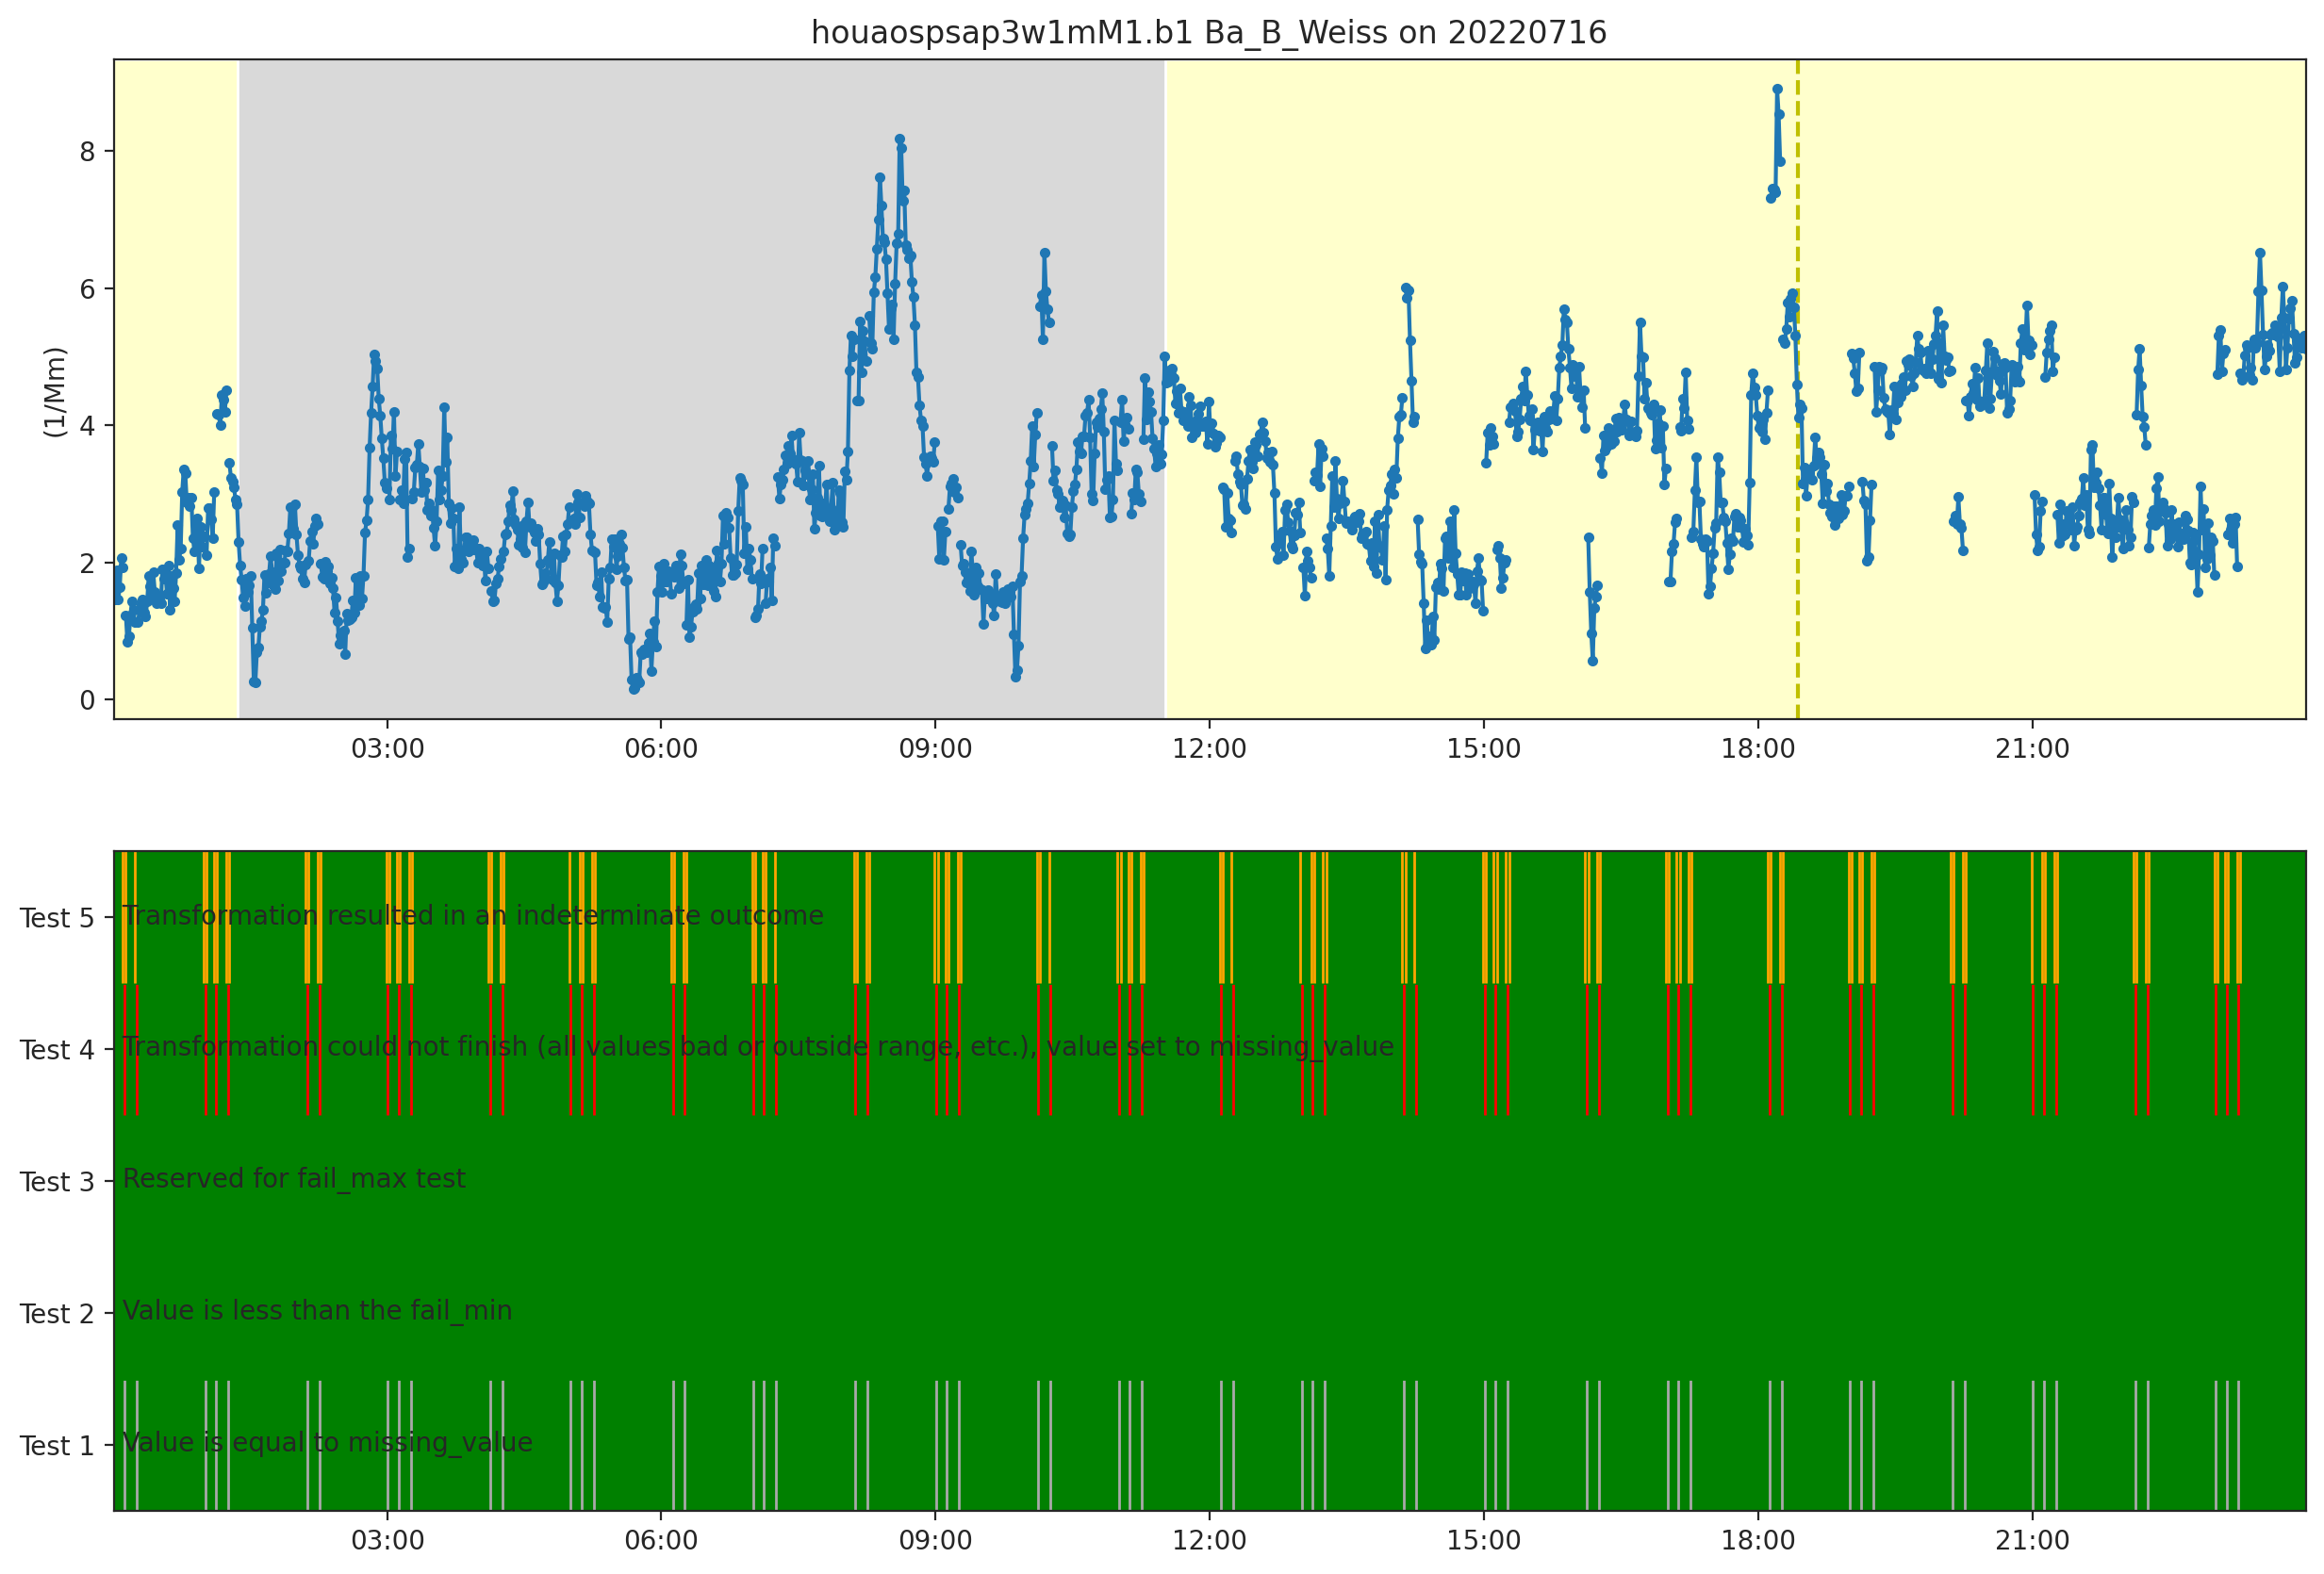

In [121]:
# We can see that there's some missing data in the plot above so let's take a look at the embedded QC!
# First, for many of the ACT QC features, we need to get the dataset more to CF standard and that
# involves cleaning up some of the attributes and ways that ARM has historically handled QC
ds.clean.cleanup()

# Next, let's take a look at visualizing the quality control information
# Create a plotting display object with 2 plots
display = act.plotting.TimeSeriesDisplay(ds, figsize=(15, 10), subplot_shape=(2,))

# Plot up the variable in the first plot
display.plot(variable, subplot_index=(0,))

# Plot up a day/night background
display.day_night_background(subplot_index=(0,))

# Plot up the QC variable in the second plot
display.qc_flag_block_plot(variable, subplot_index=(1,))
plt.show()

#### What do you observe?
There are 5 tests being applied to the data. The main ones that are flagged are tests 1, 4, and 5.  Tests 4 and 1 are tripped at the same time and if we look at the description for 4, when that test fails, it sets the data to missing_value for us.  That leaves test 5 which is suspect data so let's try and filter that data out as well to see what it looks like 

act.qc.datafilter: Transformation resulted in an indeterminate outcome


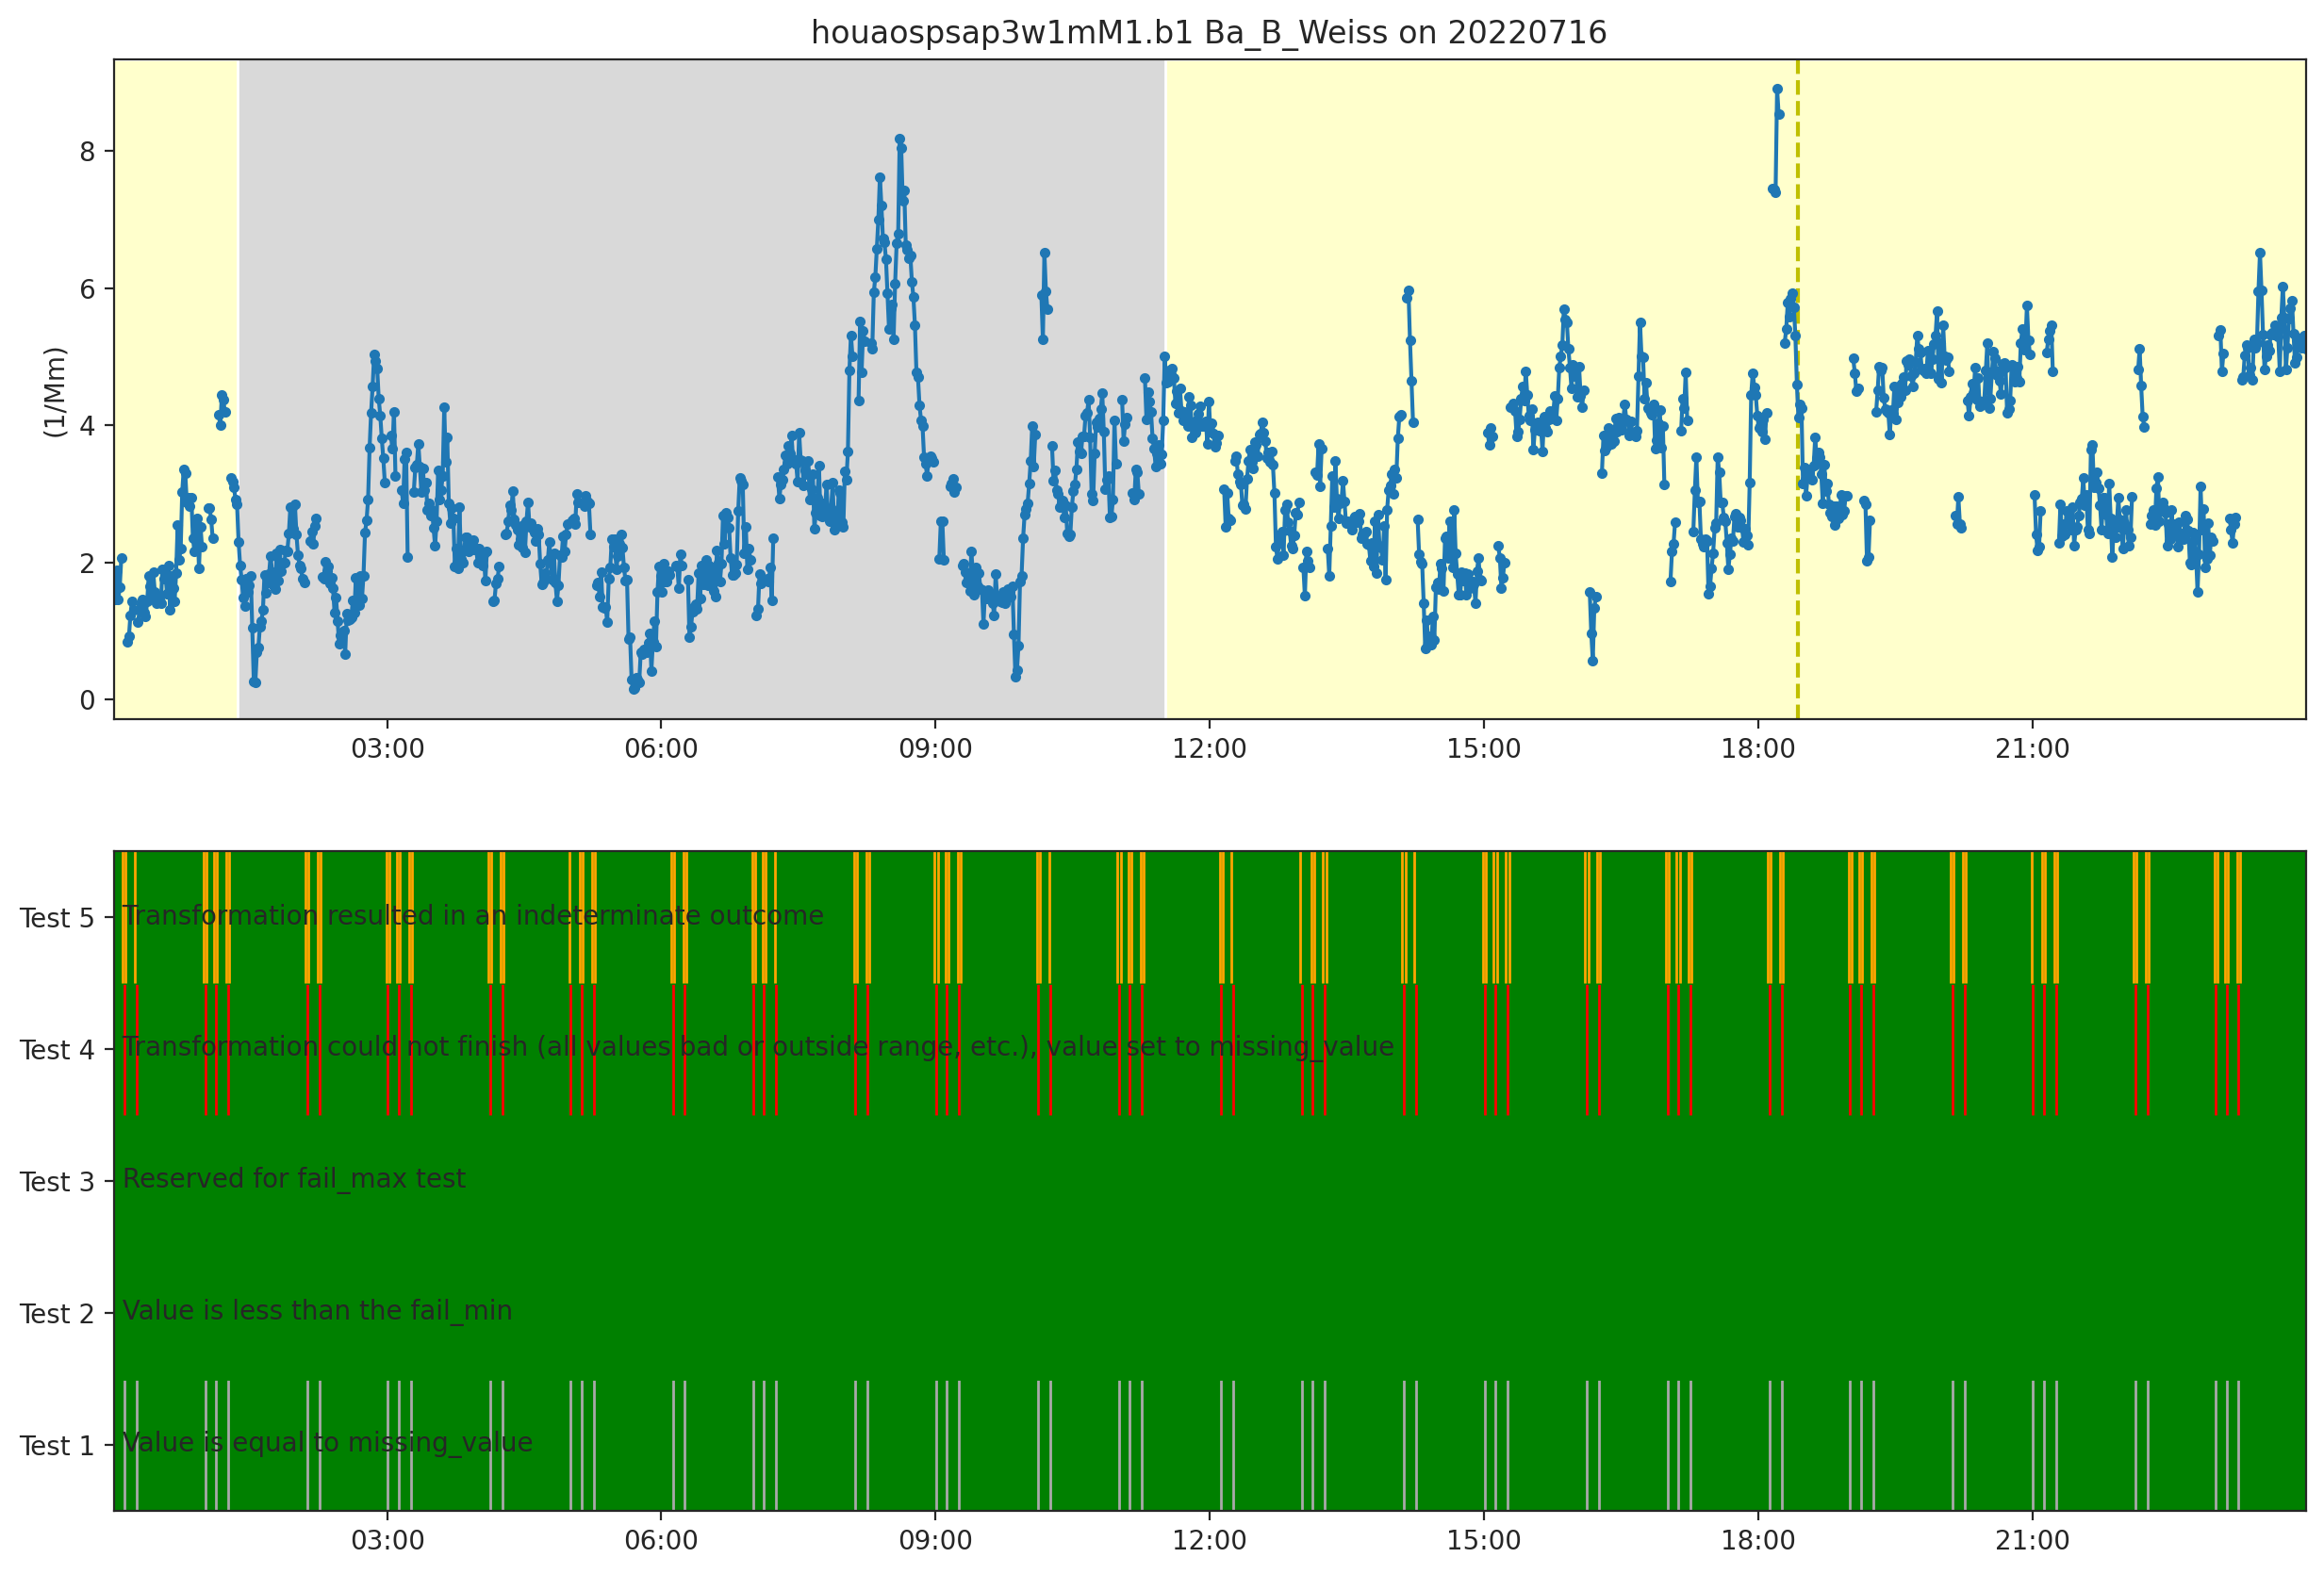

In [122]:
# Let's filter out test 5 using ACT.  Yes, it's that simple!
ds.qcfilter.datafilter(variable, rm_tests=[5], del_qc_var=False)

# There are other ways we can filter data out as well.  Using the
# rm_assessments will filter out by all Bad/Suspect tests that are failing
# ds.qcfilter.datafilter(variable, rm_assessments=['Bad', 'Suspect'], del_qc_var=False)

# Let's check out the attributes of the variable
# Whenever data are filtered out using the datafilter function
# a comment will be added to the variable history for provenance purposes
print(ds[variable].attrs['history'])

# And plot it all again!
# Create a plotting display object with 2 plots
display = act.plotting.TimeSeriesDisplay(ds, figsize=(15, 10), subplot_shape=(2,))

# Plot up the variable in the first plot
display.plot(variable, subplot_index=(0,))

# Plot up a day/night background
display.day_night_background(subplot_index=(0,))

# Plot up the QC variable in the second plot
display.qc_flag_block_plot(variable, subplot_index=(1,))
plt.show()

#### ARM Data Quality Reports (DQR)!
ARM's DQRs can be easily pulled in and added to the QC variables using ACT.  We can do that with the below one line command.  However, for this case, there won't be any DQRs on the data but let's visualize it just in case!

In [123]:
# Query the ARM DQR Webservice
ds = act.qc.add_dqr_to_qc(ds, variable=variable)

#And plot again!
# Create a plotting display object with 2 plots
display = act.plotting.TimeSeriesDisplay(ds, figsize=(15, 10), subplot_shape=(2,))

# Plot up the variable in the first plot
display.plot(variable, subplot_index=(0,))

# Plot up a day/night background
display.day_night_background(subplot_index=(0,))

# Plot up the QC variable in the second plot
display.qc_flag_block_plot(variable, subplot_index=(1,))
plt.show()

KeyboardInterrupt: 

## Visualizing Data
We've already worked with visualizing the data in basic ways but what other options are there in ACT?  This section will show you how to create a variety of different plots.  More plotting examples can be found in [ACT's Documentation](https://arm-doe.github.io/ACT/source/auto_examples/index.html#plotting-examples).

### Distribution Display

For the first example, we will go over some functions within ACT's distribution display. Functions such as, the stacked bar plot, scatter and groupby.

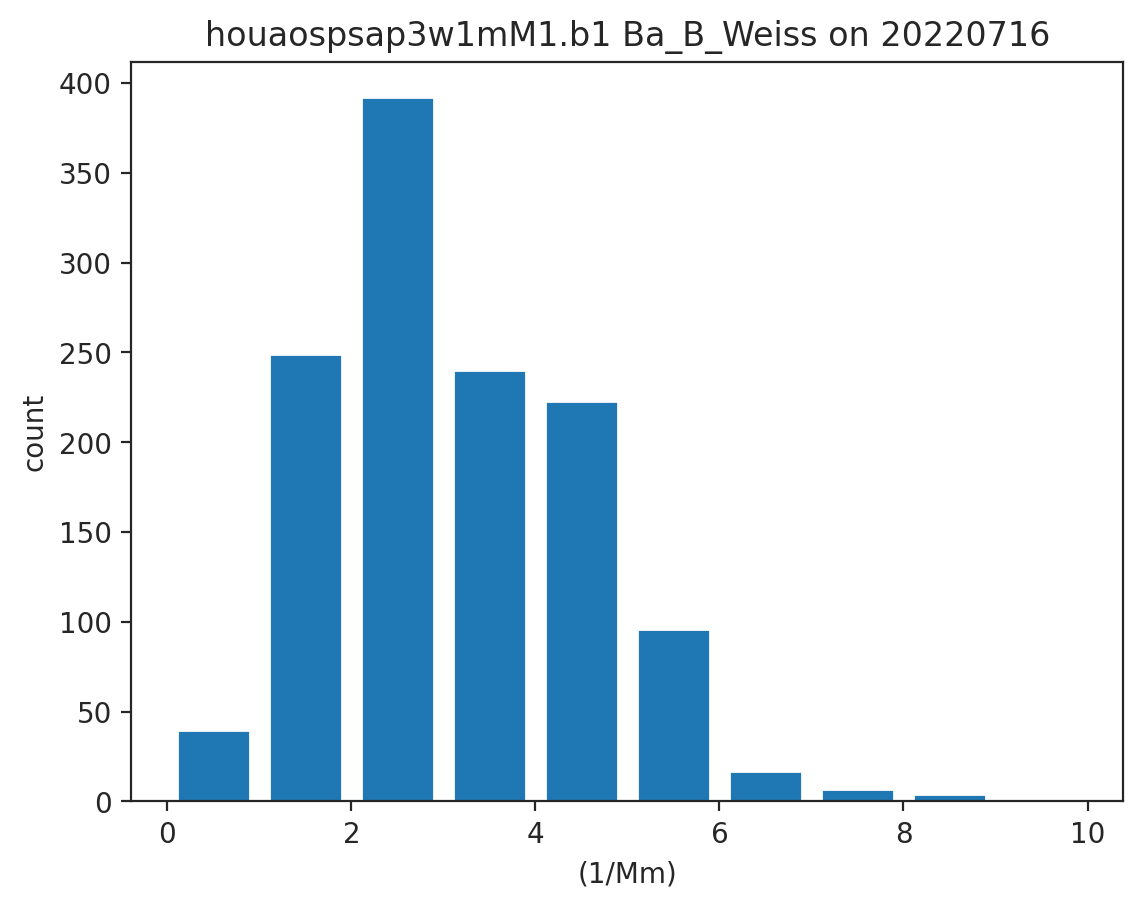

In [124]:
# First, let's plot up a histogram of the data
# All the ACT plotting is very similar to what we
# did earlier, first we create a display object
display = act.plotting.DistributionDisplay(ds)

# And then we can plot the data!  Note that we are passing a range into the
# histogram function to set the min/max range of the data
display.plot_stacked_bar(variable, hist_kwargs={'range': [0, 10]})
plt.show()

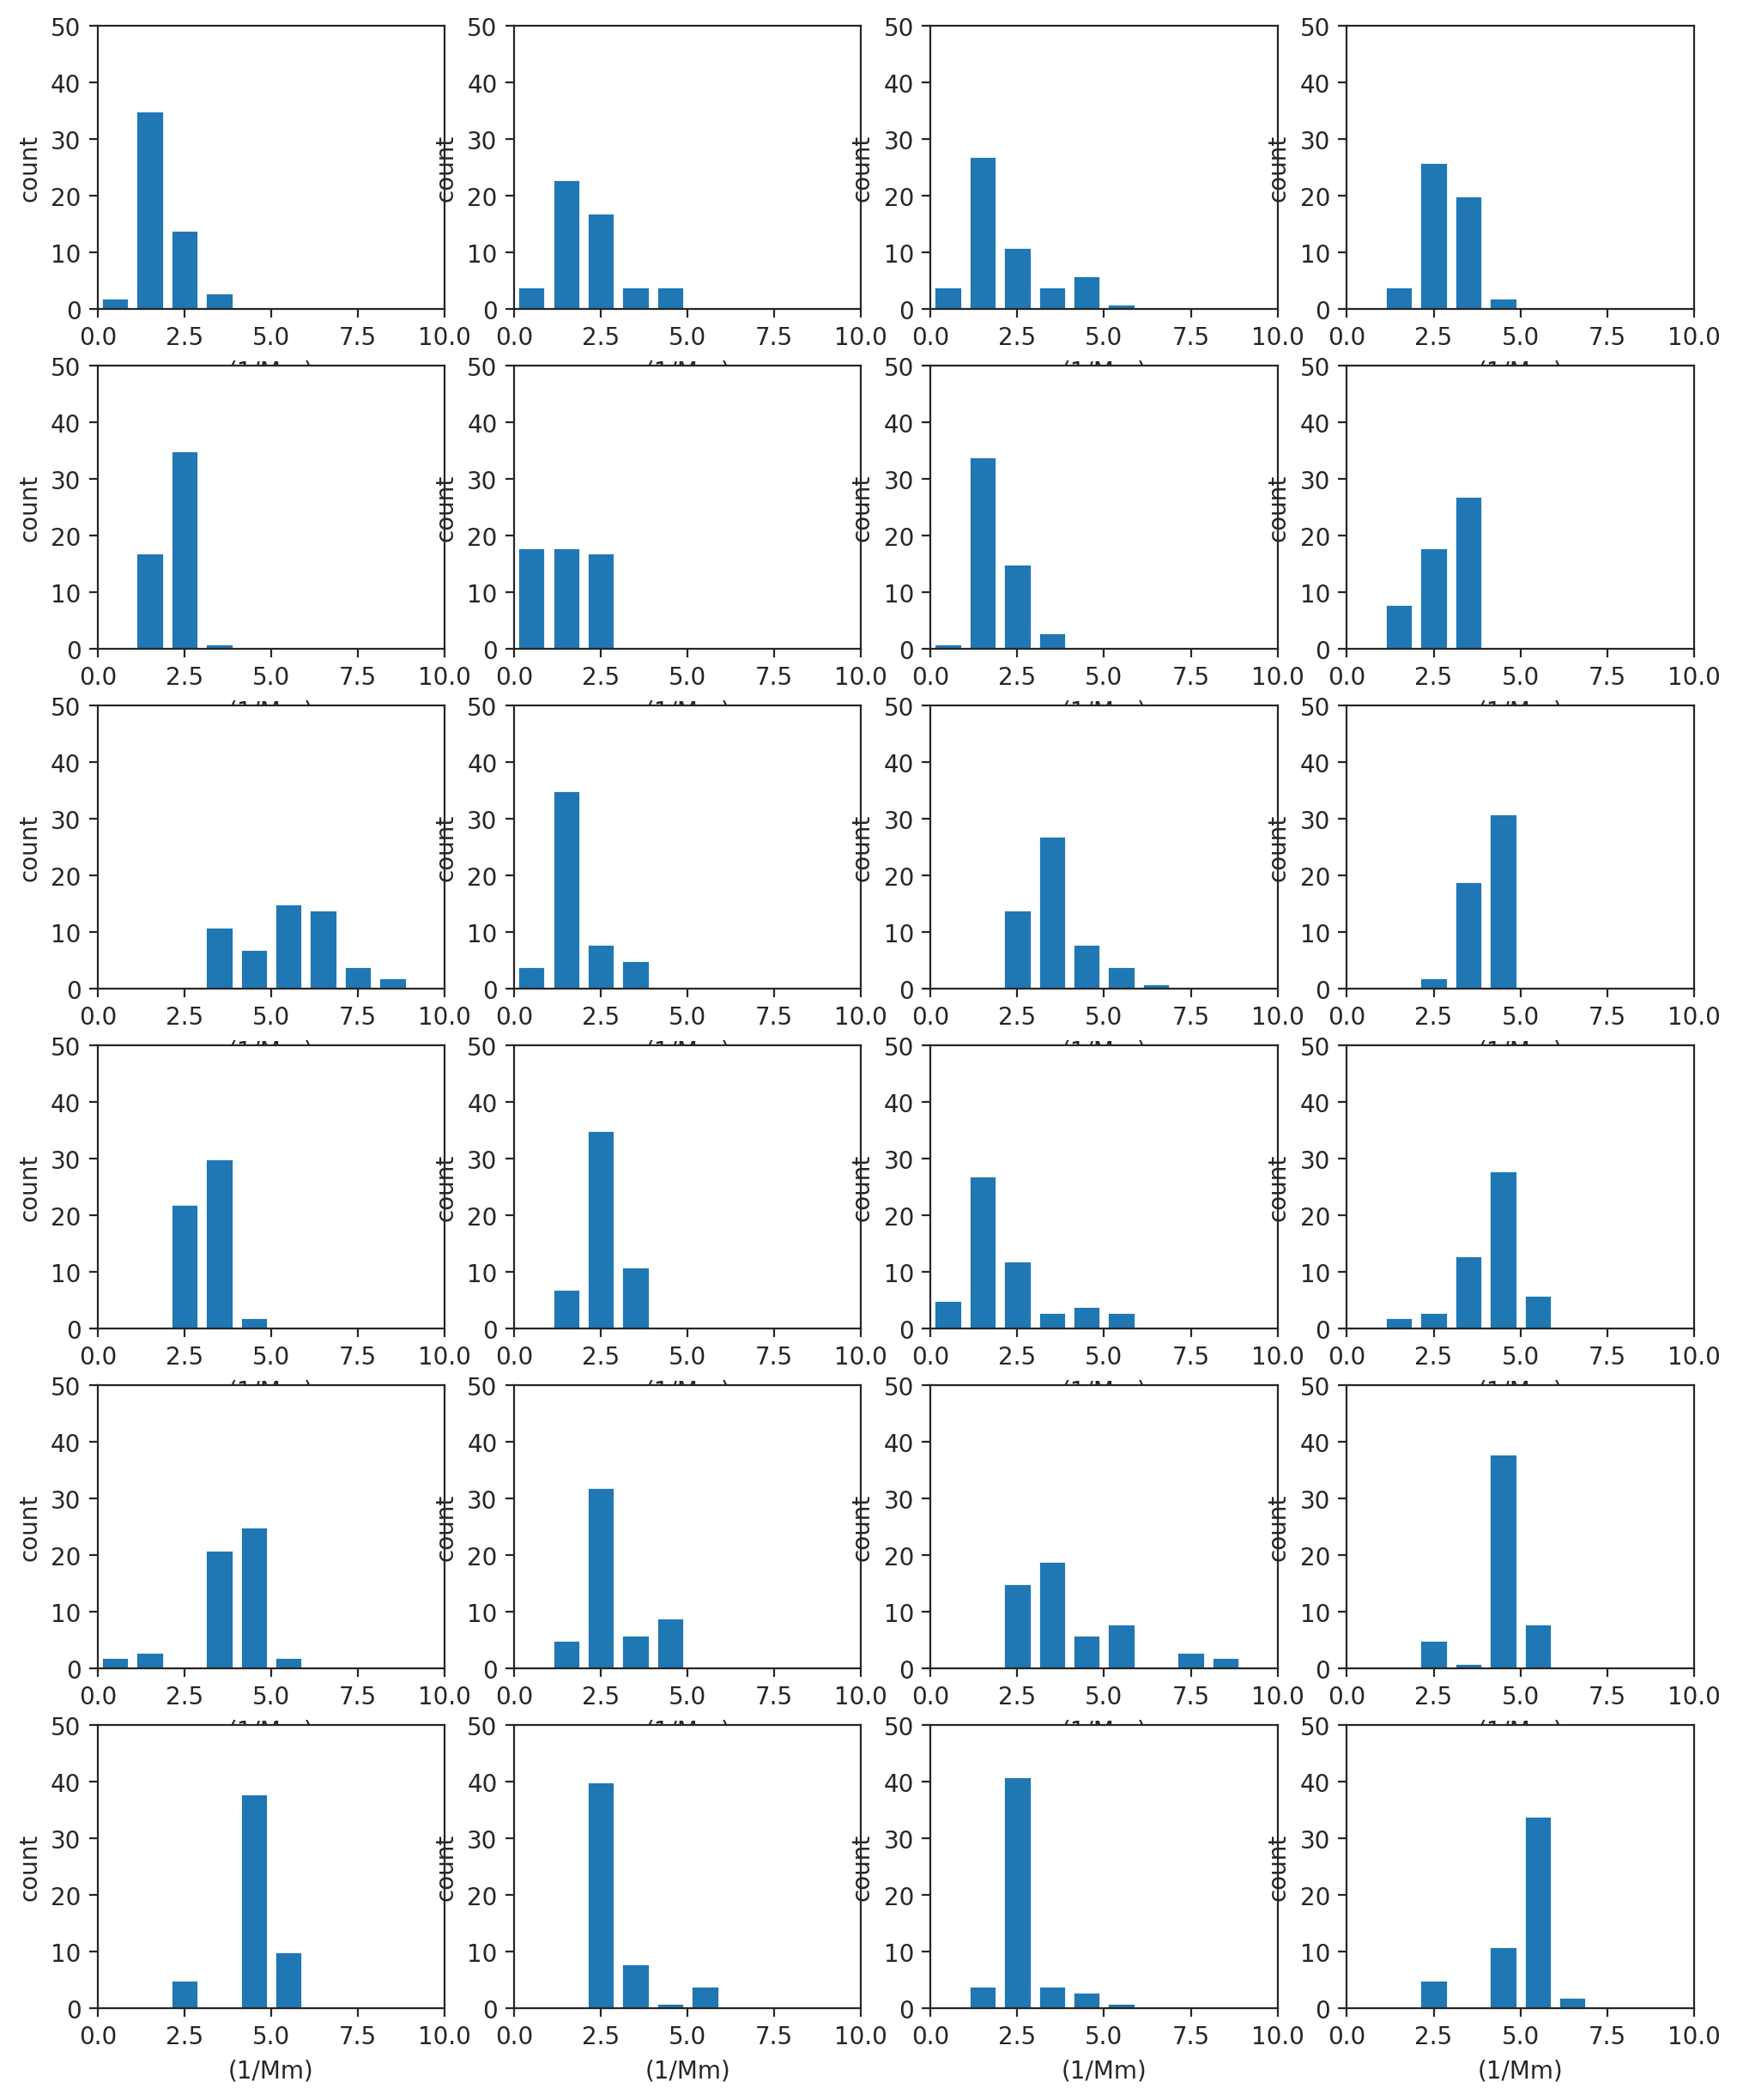

In [127]:
# We can create these plots in groups as well but we need to know
# how many there will be ahead of time for the shape
display = act.plotting.DistributionDisplay(ds, figsize=(12, 15), subplot_shape=(6, 4))
groupby = display.group_by('hour')

# And then we can plot the data in groups!  The main issue is that it doesn't automatically
# Annotate the group on the plot.  We're also setting the titile to blank to save space
groupby.plot_group('plot_stacked_bar', None, field=variable, set_title='', hist_kwargs={'range': [0, 10]})

# We want these graphs to have the same axes, so we can easily run through
# each plot and modify the axes.  Right now, we can just hard code these in
for i in range(len(display.axes)):
    for j in range(len(display.axes[i])):
        display.axes[i, j].set_xlim([0, 10])
        display.axes[i, j].set_ylim([0, 50])
        
plt.show()

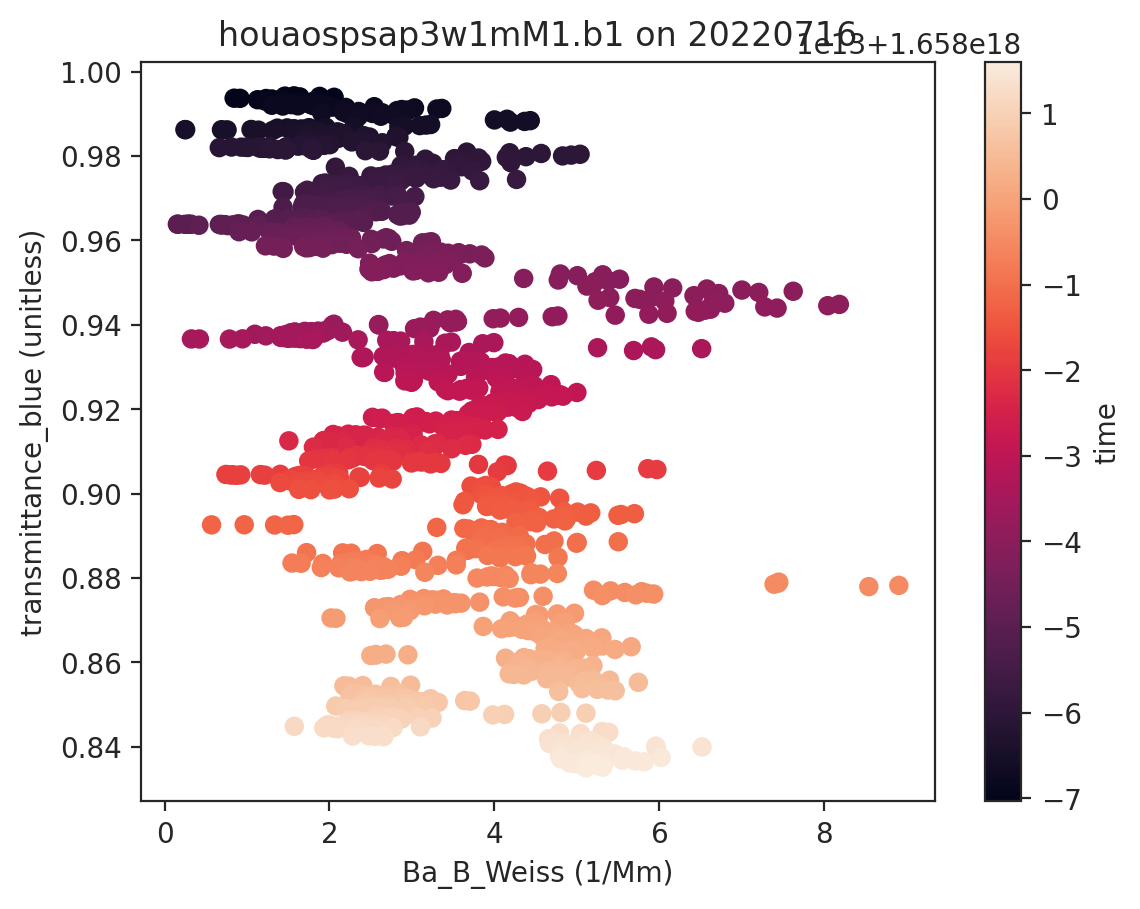

In [128]:
# Next up, let's do some scatter plots to compare some variables
# Scatter plots are also found in the DistributionDisplay module
display = act.plotting.DistributionDisplay(ds)

# And then we can plot the data!
display.plot_scatter(variable, 'transmittance_blue', m_field='time')

# You can adjust the x-range as you need
# display.set_xrng([0, 20])
plt.show()

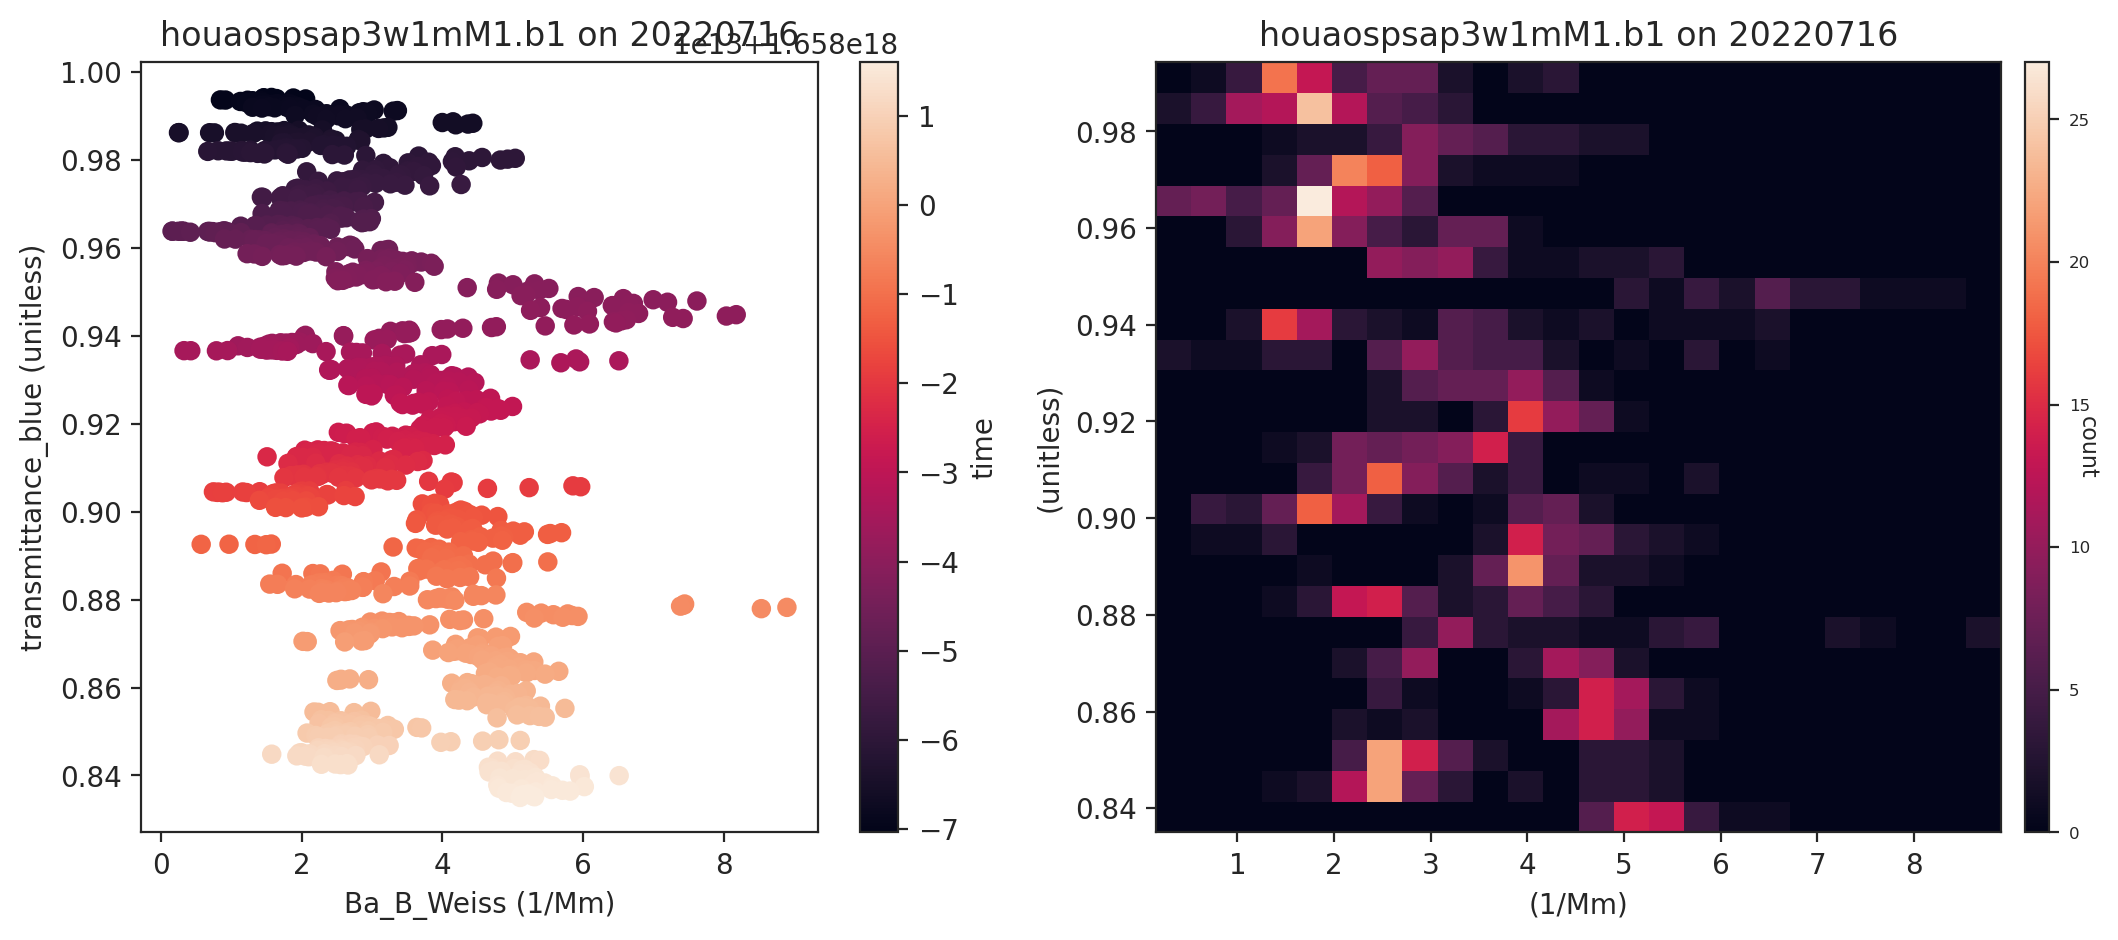

In [101]:
# Sometimes these scatter plots hide the number of points there actually
# are in some areas so let's try a heatmap as well
display = act.plotting.DistributionDisplay(ds, figsize=(12, 5), subplot_shape=(1, 2))

# And then we can plot the data!
display.plot_scatter(variable, 'transmittance_blue', m_field='time', subplot_index=(0, 0))
# This can be used to adjust the axes limits
# display.set_xrng([0, 20], subplot_index=(0, 0))

# we can also pass in an array of values for the bins using np.arange(start, stop, step)
display.plot_heatmap(variable, 'transmittance_blue', subplot_index=(0, 1), x_bins=25, y_bins=25)
plt.show()

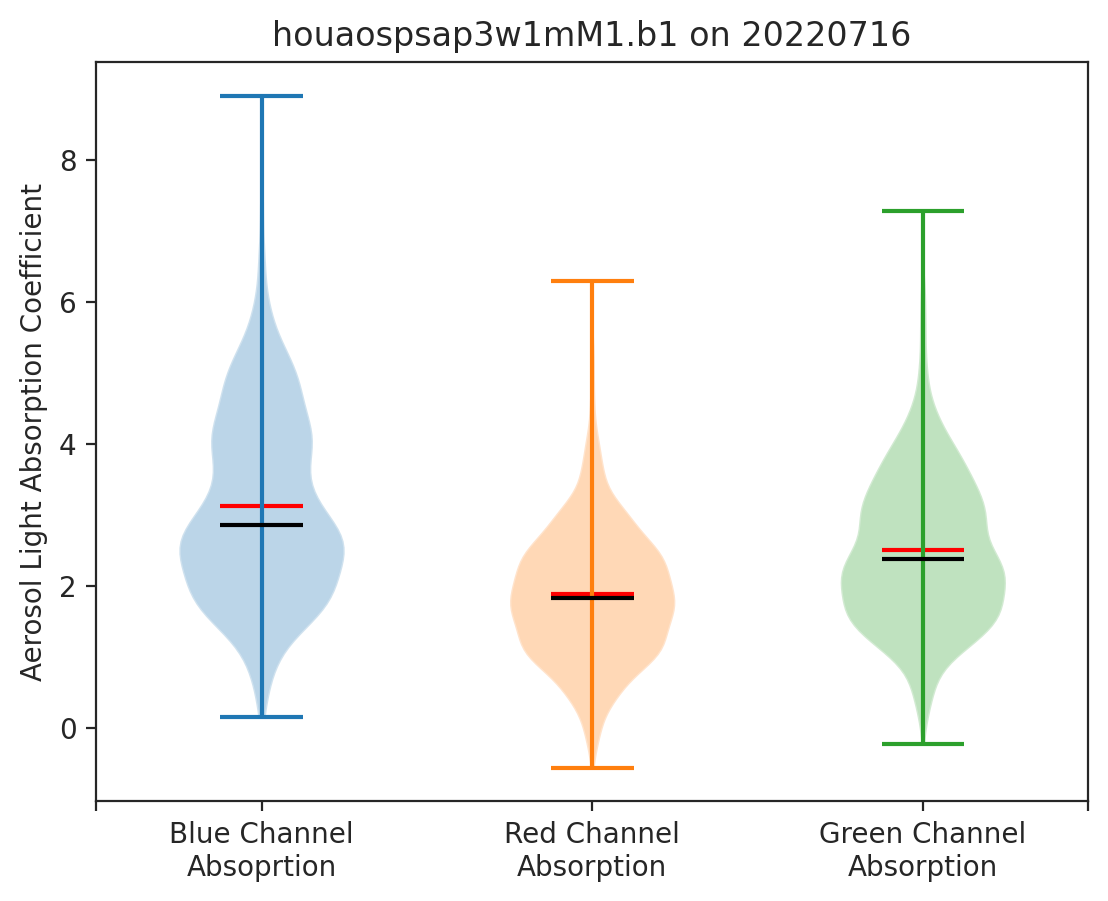

In [102]:
# Let's try one last plot type with this dataset
# Violin plots!
display = act.plotting.DistributionDisplay(ds)

# And then we can plot the data!
display.plot_violin(variable, positions=[1.0])

# And we can add more variables to it as well!
display.plot_violin('Ba_R_Weiss', positions=[2.0])
display.plot_violin('Ba_G_Weiss', positions=[3.0])

# Let's add some more information to the plots
# Update the tick information
display.axes[0].set_xticks([0.5, 1, 2, 3, 3.5])
display.axes[0].set_xticklabels(['',
                                 'Blue Channel\nAbsoprtion',
                                 'Red Channel\nAbsorption',
                                 'Green Channel\nAbsorption',
                                 '']
                                )

# Update the y-axis label
display.axes[0].set_ylabel('Aerosol Light Absorption Coefficient')
plt.show()

### Pie Chart Display

We can also do a quick visualization of aerosol data using the new pie chart display in ACT!

In [103]:
# Download the data as before
# Read an ARM AOS dataset
datastream = 'houaosacsmM1.b2'
startdate = '2022-07-16'
enddate = '2022-07-16'
result = act.discovery.download_arm_data(username, token, datastream, startdate, enddate)

# and read it in
ds_aos = act.io.read_arm_netcdf(result)

[DOWNLOADING] houaosacsmM1.b2.20220716.002132.nc

If you use these data to prepare a publication, please cite:

Zawadowicz, M., Howie, J., Hayes, C., Allain, M., Salwen, C., & Behrens, B.
Aerosol Chemical Speciation Monitor (AOSACSM). Atmospheric Radiation Measurement
(ARM) User Facility. https://doi.org/10.5439/1762267



In [104]:
# Let us print out the fields in the dataset and see what it contains.
print(ds_aos.data_vars.keys())

# Knowing what fields the dataset contains, let's create a list of fields
# to use in the plot.

fields = ['sulfate', 'ammonium', 'nitrate', 'chloride']

# We also want to provide some keyword arguments to avoid invalid data such
# as negative values.
threshold = 0.0
fill_value = 0.0

KeysView(Data variables:
    base_time                     datetime64[ns] 8B 2022-07-16
    time_offset                   (time) datetime64[ns] 392B 2022-07-16T00:21...
    time_bounds                   (time, bound) object 784B dask.array<chunksize=(49, 2), meta=np.ndarray>
    total_organics                (time) float32 196B dask.array<chunksize=(49,), meta=np.ndarray>
    qc_total_organics             (time) int32 196B dask.array<chunksize=(49,), meta=np.ndarray>
    sulfate                       (time) float32 196B dask.array<chunksize=(49,), meta=np.ndarray>
    qc_sulfate                    (time) int32 196B dask.array<chunksize=(49,), meta=np.ndarray>
    ammonium                      (time) float32 196B dask.array<chunksize=(49,), meta=np.ndarray>
    qc_ammonium                   (time) int32 196B dask.array<chunksize=(49,), meta=np.ndarray>
    nitrate                       (time) float32 196B dask.array<chunksize=(49,), meta=np.ndarray>
    qc_nitrate                    (ti

/opt/conda/lib/python3.11/site-packages/act/utils/data_utils.py:1397: UserWarning: No time parameter used, calculating a mean for each field for the whole dataset.
  warnings.warn(


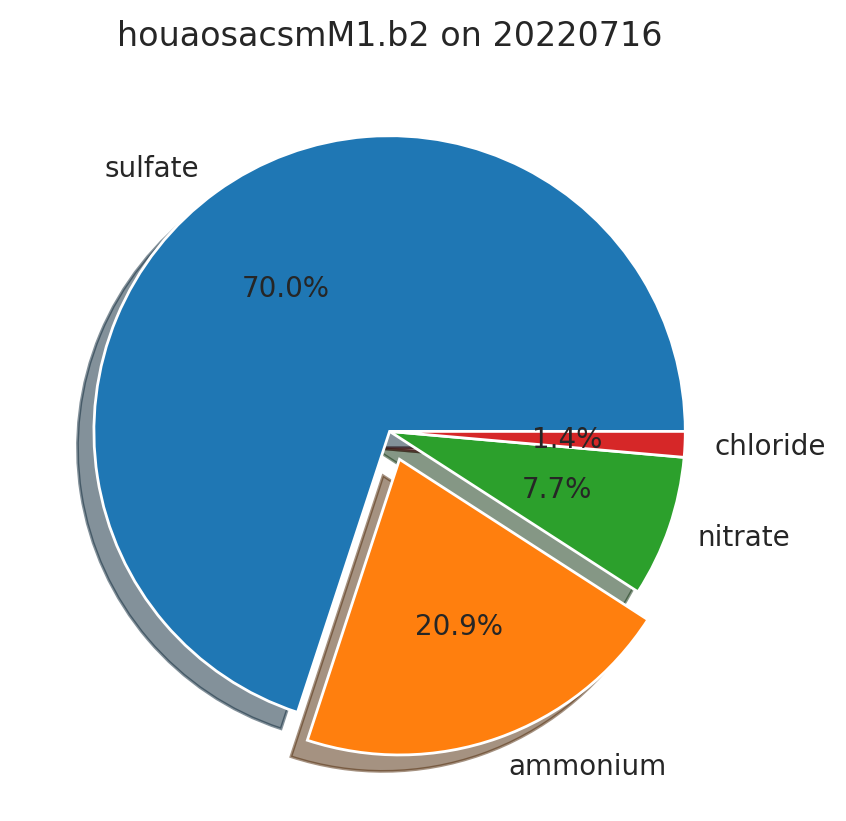

In [105]:
# Create a DistributionDisplay object to compare fields
display = act.plotting.DistributionDisplay(ds_aos)

# We can set one of the slices to explode and give it a nice shadow.
explode = (0, 0.1, 0, 0)
shadow = True

# Create a pie chart using the fields list. The percentages of the
# fields will be calculated using act.utils.calculate_percentages.
display.plot_pie_chart(
    fields,
    threshold=threshold,
    fill_value=fill_value,
    explode=explode,
    shadow=True,
)
plt.show()

---

## Questions for the User to Explore
1. What does the data look like for the full month of July?  Do we have to do more to properly visualize the data?
1. What do the scatter plots look like when plotted against the red channel absorption coefficient vs the transmittance?
1. Can you change the groupby plot to be for each day instead of by hour?

[DOWNLOADING] houaospsap3w1mM1.b1.20220720.000030.nc
[DOWNLOADING] houaospsap3w1mM1.b1.20220703.000030.nc
[DOWNLOADING] houaospsap3w1mM1.b1.20220729.000030.nc
[DOWNLOADING] houaospsap3w1mM1.b1.20220728.000030.nc
[DOWNLOADING] houaospsap3w1mM1.b1.20220716.000030.nc
[DOWNLOADING] houaospsap3w1mM1.b1.20220704.000030.nc
[DOWNLOADING] houaospsap3w1mM1.b1.20220730.000030.nc
[DOWNLOADING] houaospsap3w1mM1.b1.20220727.000030.nc
[DOWNLOADING] houaospsap3w1mM1.b1.20220724.000030.nc
[DOWNLOADING] houaospsap3w1mM1.b1.20220706.000030.nc
[DOWNLOADING] houaospsap3w1mM1.b1.20220718.000030.nc
[DOWNLOADING] houaospsap3w1mM1.b1.20220713.000030.nc
[DOWNLOADING] houaospsap3w1mM1.b1.20220712.000030.nc
[DOWNLOADING] houaospsap3w1mM1.b1.20220710.000030.nc
[DOWNLOADING] houaospsap3w1mM1.b1.20220725.000030.nc
[DOWNLOADING] houaospsap3w1mM1.b1.20220721.000030.nc
[DOWNLOADING] houaospsap3w1mM1.b1.20220714.000030.nc
[DOWNLOADING] houaospsap3w1mM1.b1.20220719.000030.nc
[DOWNLOADING] houaospsap3w1mM1.b1.20220707.000

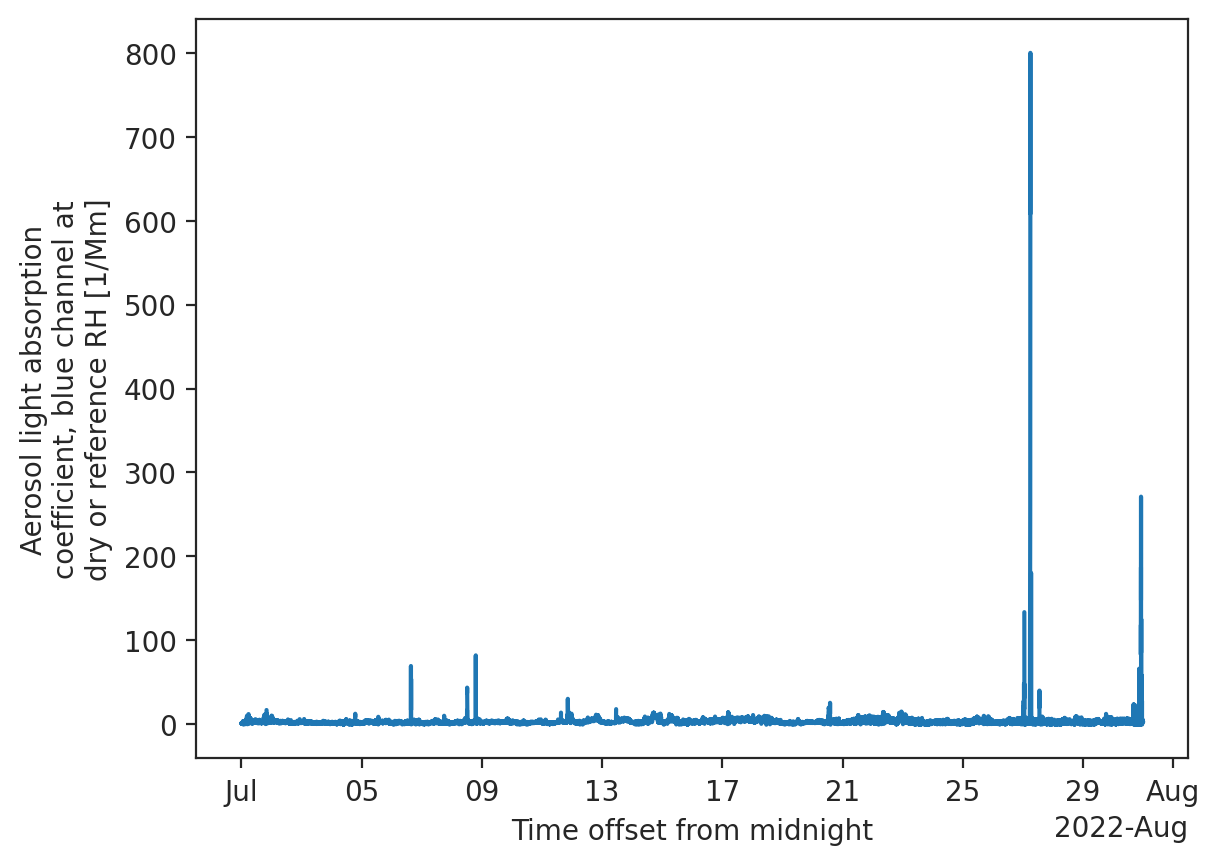

In [106]:
# Set the datastream and start/enddates
datastream = 'houaospsap3w1mM1.b1'
startdate = '2022-07-01'
enddate = '2022-07-31'

# Use ACT to easily download the data.  Watch for the data citation!  Show some support
# for ARM's instrument experts and cite their data if you use it in a publication
result = act.discovery.download_arm_data(username, token, datastream, startdate, enddate)
ds = act.io.read_arm_netcdf(result)
variable = 'Ba_B_Weiss'
ds[variable].plot()

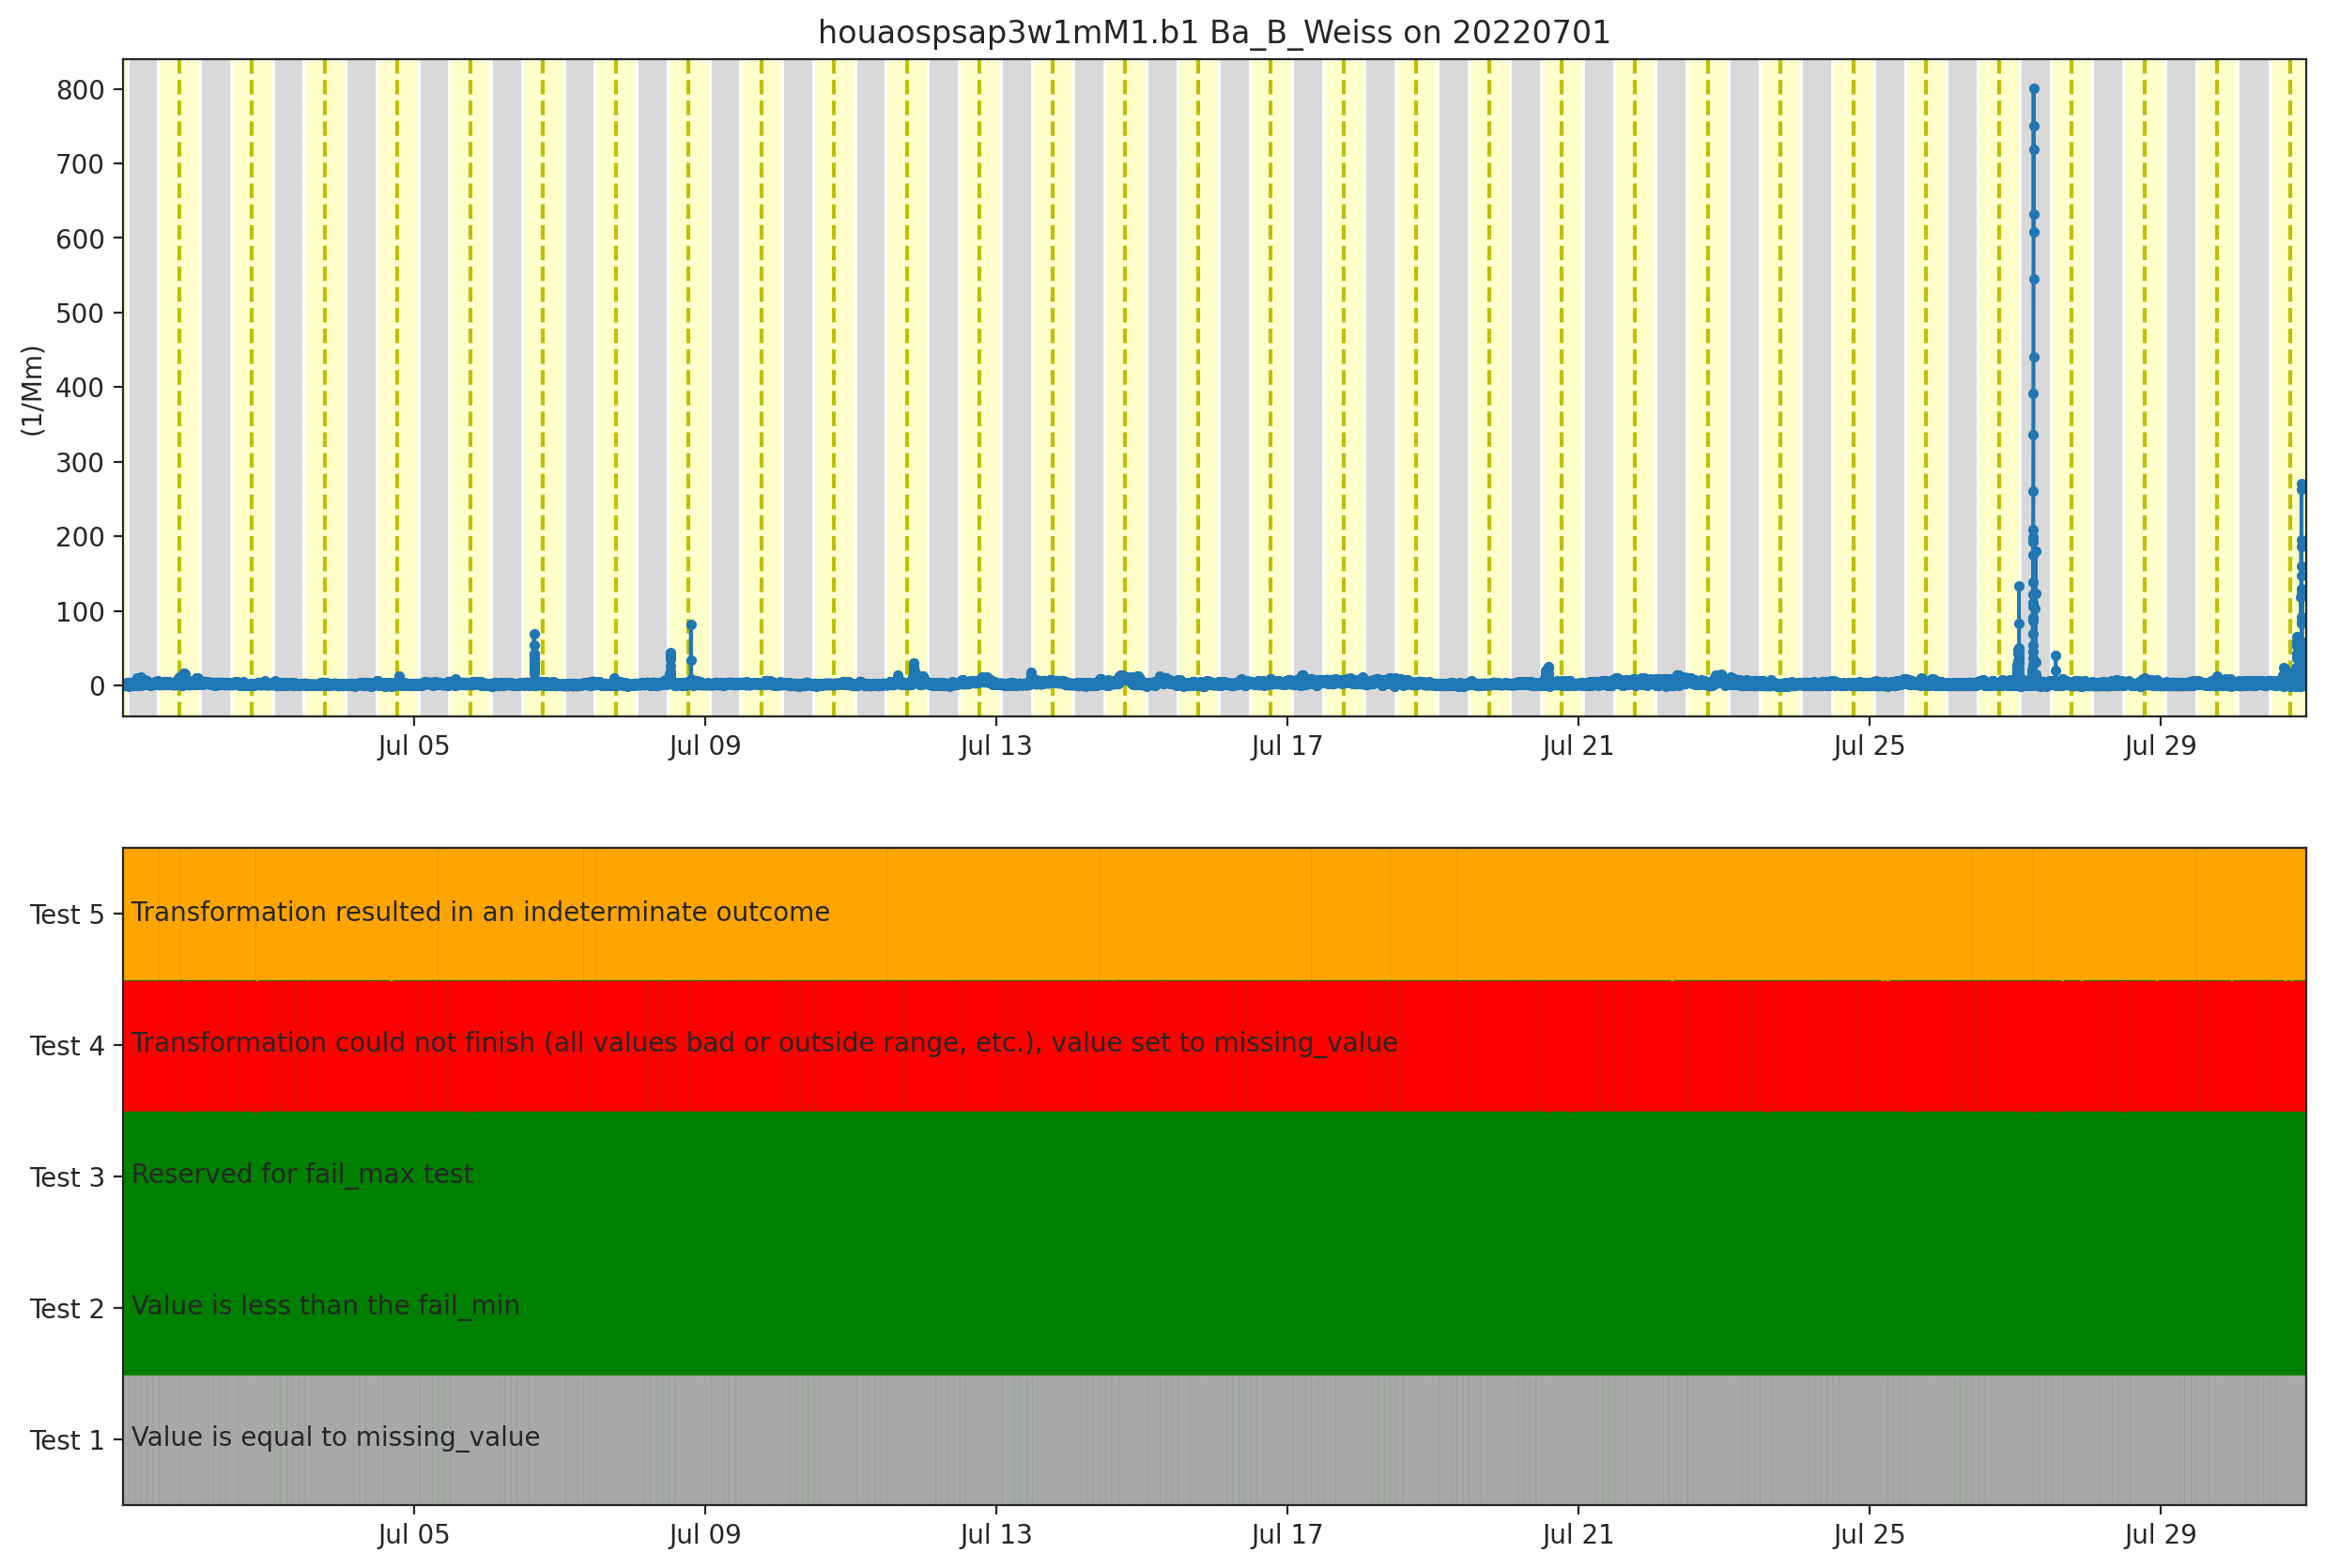

In [107]:
ds.clean.cleanup()

display = act.plotting.TimeSeriesDisplay(ds, figsize=(15, 10), subplot_shape=(2,))
display.plot(variable, subplot_index=(0,))
display.day_night_background(subplot_index=(0,))

display.qc_flag_block_plot(variable, subplot_index=(1,))
plt.show()

act.qc.datafilter: Transformation resulted in an indeterminate outcome
 act.qc.datafilter: Value is equal to missing_value
 act.qc.datafilter: Value is less than the fail_min
 act.qc.datafilter: Reserved for fail_max test
 act.qc.datafilter: Transformation could not finish (all values bad or outside range, etc.), value set to missing_value


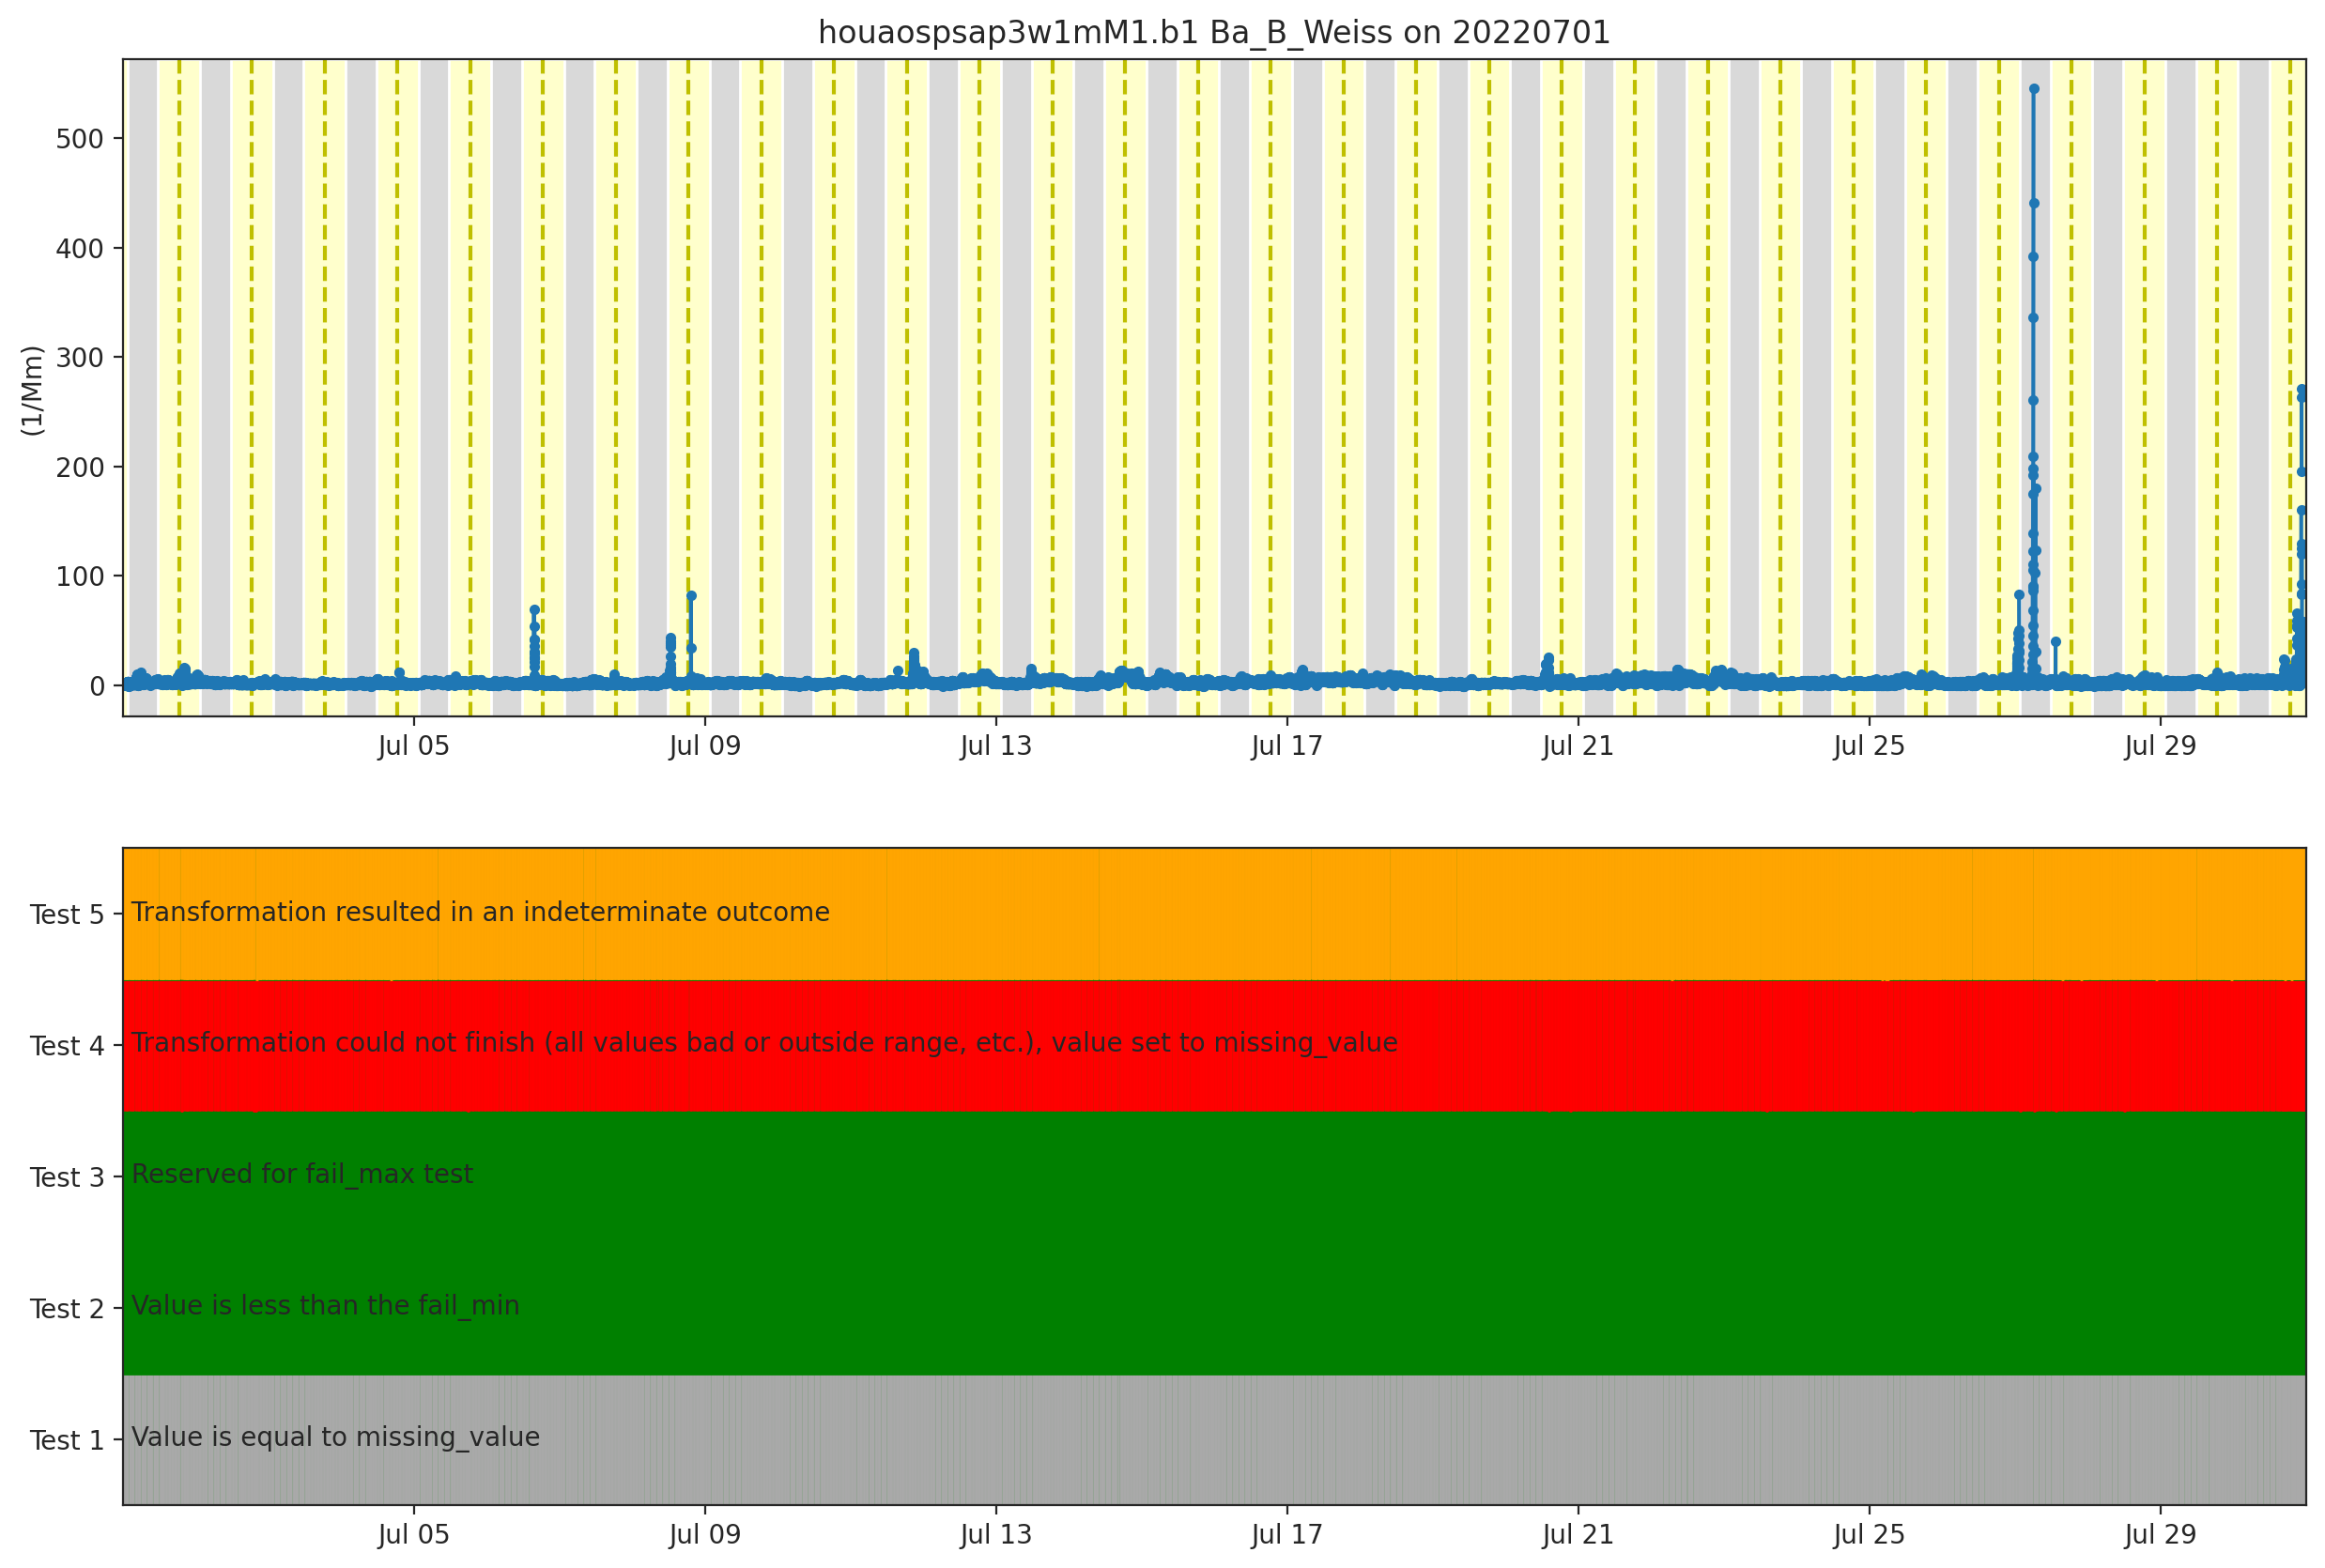

In [109]:
ds.qcfilter.datafilter(variable, rm_assessments=['Bad'], del_qc_var=False)
print(ds[variable].attrs['history'])

display = act.plotting.TimeSeriesDisplay(ds, figsize=(15, 10), subplot_shape=(2,))
display.plot(variable, subplot_index=(0,))
display.day_night_background(subplot_index=(0,))

display.qc_flag_block_plot(variable, subplot_index=(1,))
plt.show()

Text(0.5, 1.0, 'Aerosol light absorption, July 2022')

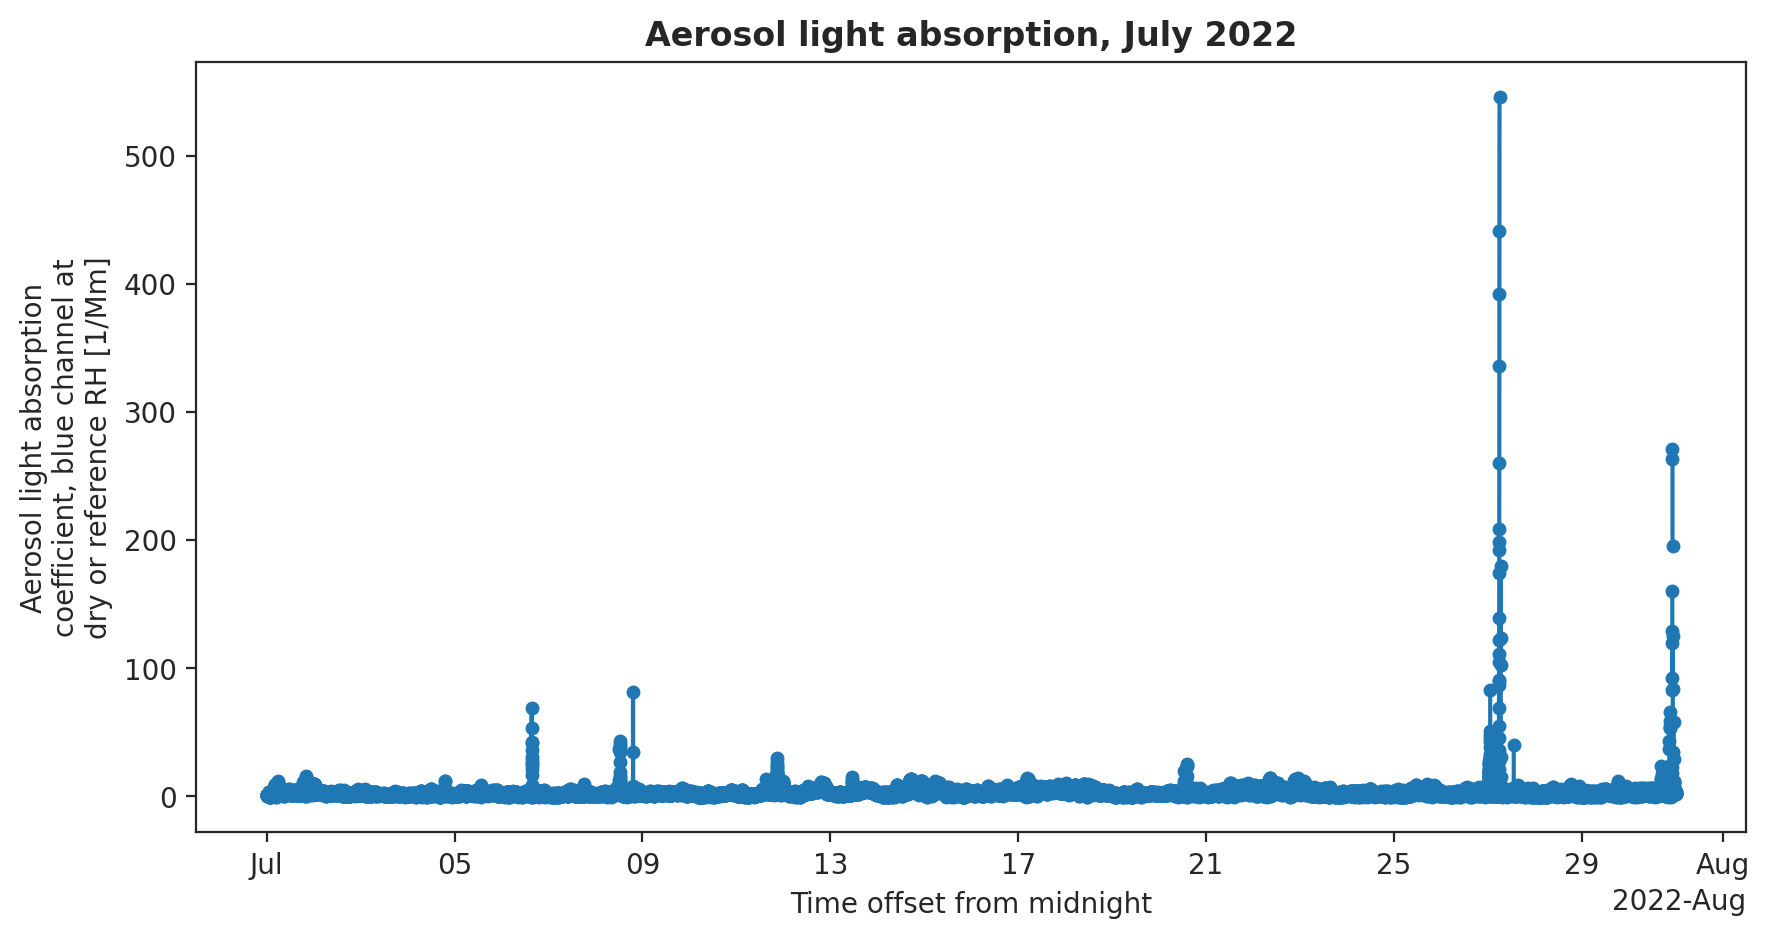

In [110]:
fig, ax = plt.subplots(figsize = (10, 5))
ds[variable].plot(ax = ax, marker = 'o', markersize = 4)
ax.set_title('Aerosol light absorption, July 2022', weight = 'bold')

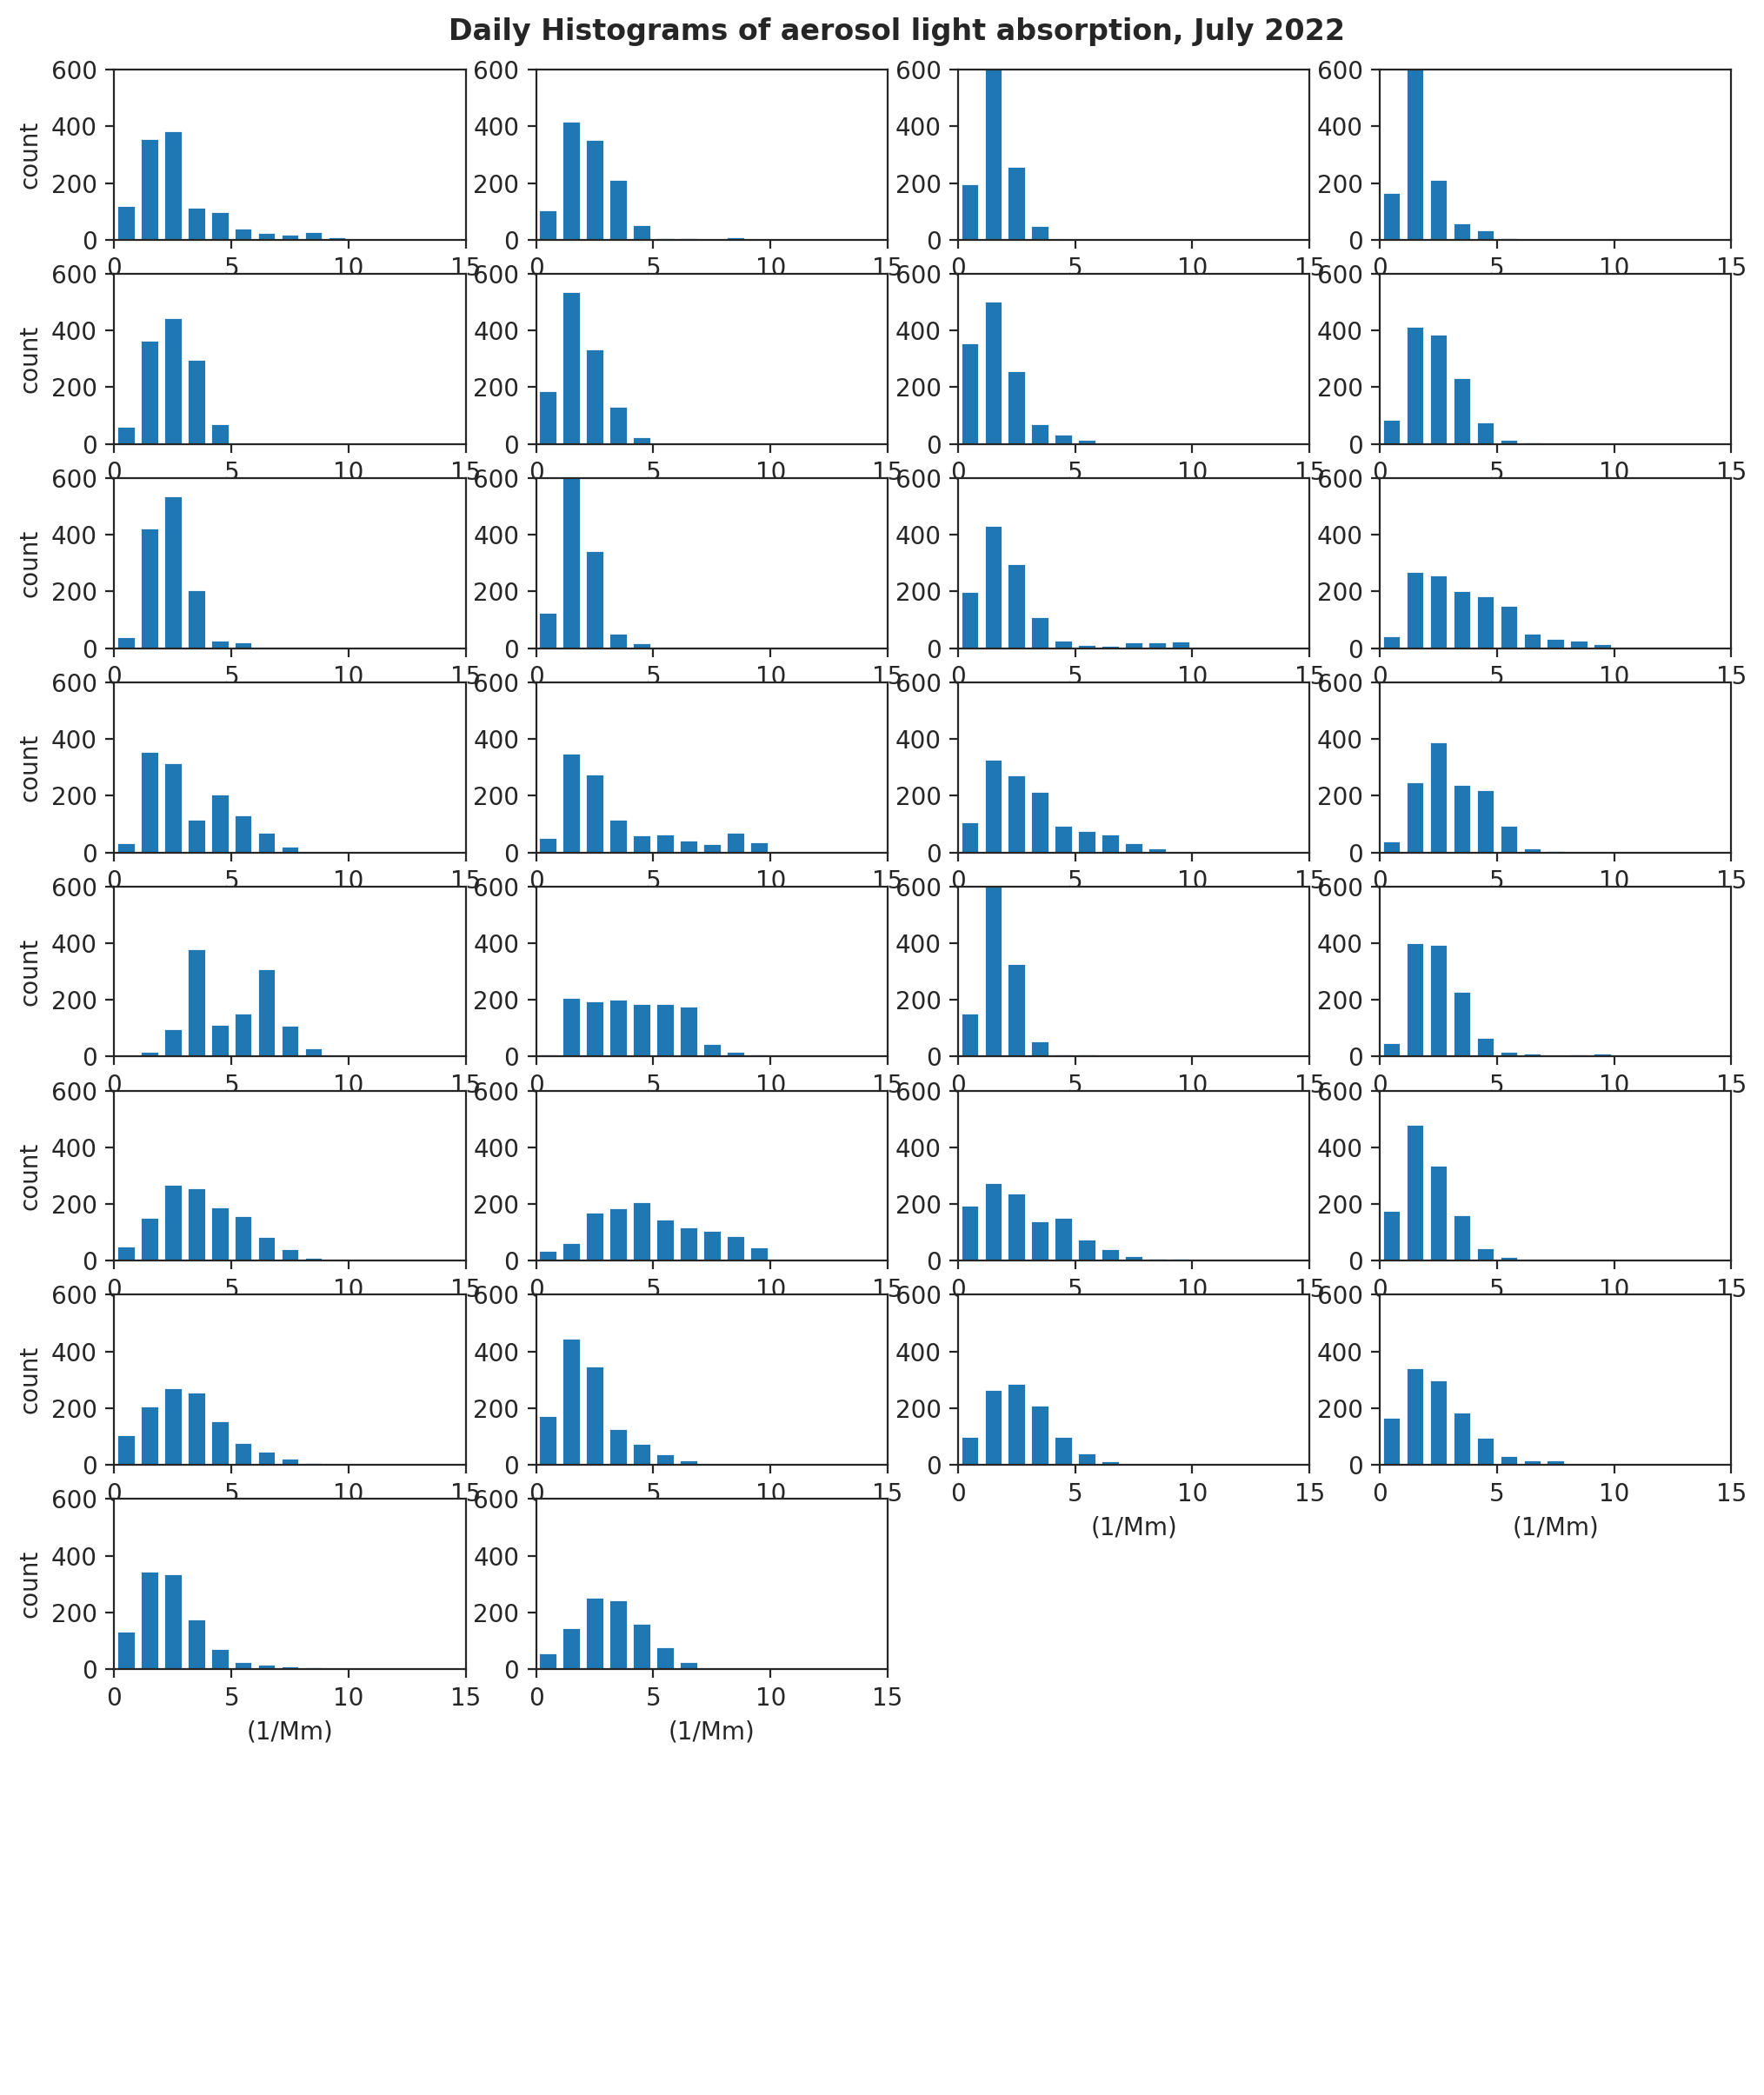

In [111]:
display = act.plotting.DistributionDisplay(ds, figsize=(12, 15), subplot_shape=(10, 4))
groupby = display.group_by('day')

# And then we can plot the data in groups!  The main issue is that it doesn't automatically
# Annotate the group on the plot.  We're also setting the titile to blank to save space
groupby.plot_group('plot_stacked_bar', None, field=variable, set_title='', hist_kwargs={'range': [0, 10]})

# We want these graphs to have the same axes, so we can easily run through
# each plot and modify the axes.  Right now, we can just hard code these in
for i in range(len(display.axes)):
    for j in range(len(display.axes[i])):

        if (j != 0):
            display.axes[i, j].set_ylabel('')
        display.axes[i, j].set_xlim([0, 15])
        display.axes[i, j].set_ylim([0, 600])

plt.suptitle('Daily Histograms of aerosol light absorption, July 2022', weight = 'bold', y = 0.9)
plt.show()

Text(0.5, 1.0, 'Absorption v. transmittance')

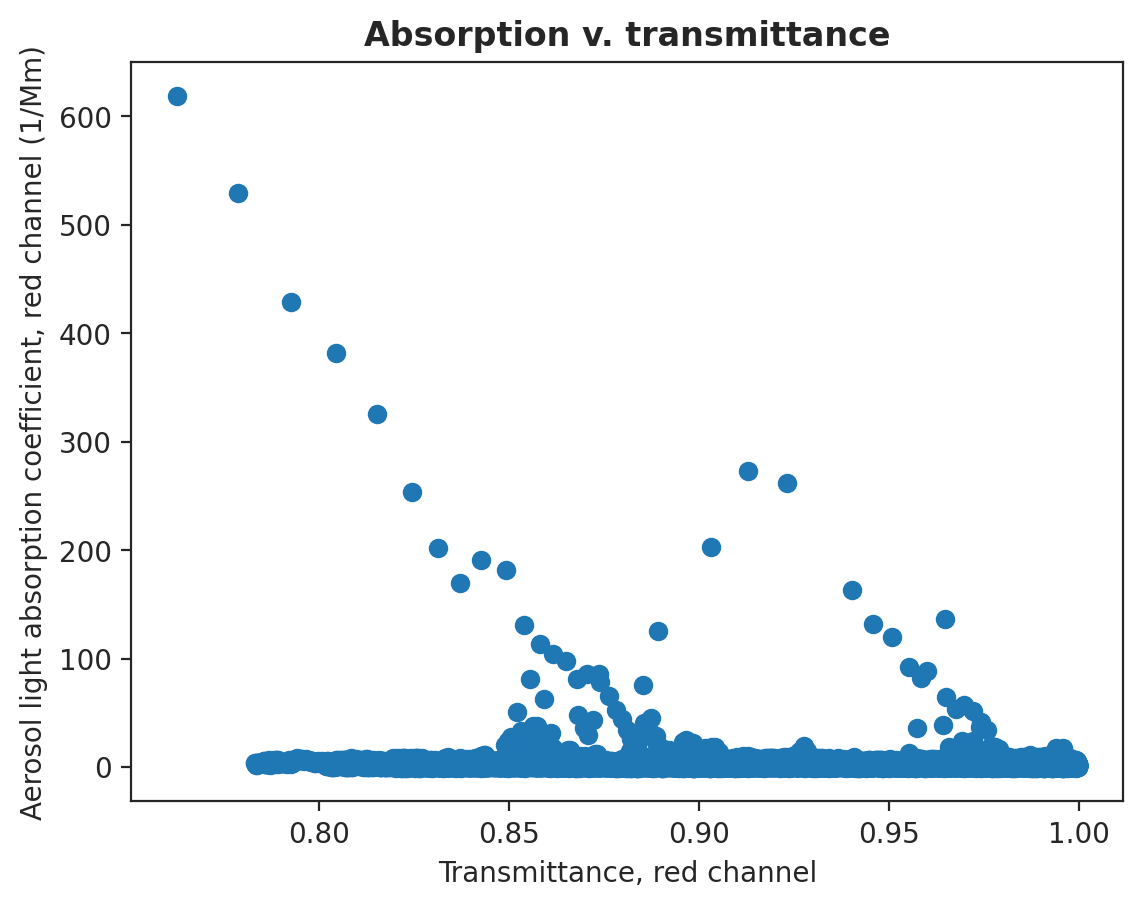

In [114]:
fig, ax = plt.subplots()

variable1 = 'Ba_R_Weiss'
variable2 = 'transmittance_red'

ds.qcfilter.datafilter(variable1, rm_assessments=['Bad', 'Incorrect', 'Indeterminate', 'Suspect'], del_qc_var=False)
ds.qcfilter.datafilter(variable2, rm_assessments=['Bad', 'Incorrect', 'Indeterminate', 'Suspect'], del_qc_var=False)

ax.scatter(ds[variable2], ds[variable1])
ax.set_ylabel('Aerosol light absorption coefficient, red channel (1/Mm)')
ax.set_xlabel('Transmittance, red channel')
ax.set_title('Absorption v. transmittance', weight = 'bold')

---

## Next Steps
The next notebook in this series will help the users explore other datasets that can be utilized to analyze this dust event.  These include using data from the instruments previously noted here.

### Data Used in this Notebook
Ermold, B., & Flynn, C. Particle Soot Absorption Photometer (AOSPSAP3W1M). Atmospheric Radiation Measurement (ARM) User Facility. https://doi.org/10.5439/1225037